<h1> Capstone Project </h1>
<h3> Project Name: Student Applications & Performance </h3>
<br>
**Clearwater State University** offers a wide variety of degree programs, from online degrees to a doctorate in education. Programs are offered in the streams of the arts, education, business & nursing.
<br><h4> Some key strategic goals of the University are:</h4>
<br>1. Increase enrolment of students
<br>2. Improve retention, progression and graduation rates
<br>3. Recruit better academically qualified undergraduate and graduate students
<br>4. Increase external funding and recognition

### Index:

1. Importing Libraries
2. Reading the data <br>
    2.1 Data Describe <br>
    2.2 Continuous variables <br>
    2.3 Categorical variables <br>
3. Missing Value Treatment   
    3.1 Continuous variables <br>
    3.2 Categorical variables <br>
    3.3 Dropping extra variables <br>
4. Decile Analysis
5. Deriving the Dependant Variable <br>
    5.1 Table calculation <br>
    5.2 Pie chart
6. Decriptive Statistics <br>
    6.1 Insights on the financial background, financial aid <br>
    6.2 Mean <br>
    6.3 Variance <br>
    6.4 Skewness <br>
    6.5 Kurtosis 
7.  Crosstabs <br>
    7.1 Chi-square Test of Association <br>
    7.2 Hypothesis
8. Grouped Tables
9. Quantile
10. Correlation of variables
11. Univariate Analysis
12. Bivariate Analysis
13. Outlier Detection
14. Cluster Mapping
15. Feature Engineering <br>
    15.1 One-Hot Encoding
16. Splitting Dataset into Train & Test
17. VIF
18. Model Building <br>
    17.1 Binary Logistic Regression <br>
    17.2 Decision Tree Classifier <br>
    17.3 Random Forest
19. Model Accuracies

In [1]:
import pandas as pd
from pandas import *
import numpy as np
import os
from scipy.stats import kurtosis, skew
from scipy import stats
import researchpy as rp
from sklearn.feature_selection import SelectKBest, chi2
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

print(os.getcwd())

F:\BA - Jigsaw\Capstone project\Project


In [2]:
data= pd.read_excel("Student Applications & Performance.xlsx", sheet_name='University information')
print(data.shape)
data.head()

(3400, 56)


,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


In [3]:
#RP = rp.summary_cat(dat1['STDNT_MAJOR'])
data.describe()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,SECOND_TERM,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_CD,MOTHER_HI_EDU_CD,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
count,3.400000e+03,3400.000000,1106.000000,2492.000000,2882.000000,3400.000000,3400.000000,3400.000000,3375.000000,3347.000000,2968.000000,2911.000000,3400.000000,3400.000000,3194.000000,3191.000000,3.400000e+03,3.400000e+03,3.400000e+03,3.400000e+03
mean,7.897155e+06,17.994118,20.660036,965.092295,997.758501,200777.000000,200871.000000,0.787353,99.825185,3.202738,2.560647,2.571281,13.985882,12.205000,14.285848,12.511125,3.034025e+05,5.515335e+05,3.446899e+05,7.222052e+04
std,8.083421e+04,0.552052,3.234734,209.088633,156.268221,170.001298,170.001298,0.409240,235.196984,0.455337,0.681273,0.611729,1.554286,2.986294,2.104387,3.470492,4.836255e+05,6.064403e+05,7.871878e+05,2.795679e+05
min,7.755837e+06,16.000000,8.000000,350.000000,530.000000,200508.000000,200602.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.212072e+06
25%,7.827039e+06,18.000000,18.000000,900.000000,910.000000,200608.000000,200702.000000,1.000000,69.000000,2.870000,2.000000,2.000000,13.000000,11.000000,13.000000,11.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.899052e+06,18.000000,20.000000,990.000000,990.000000,200808.000000,200902.000000,1.000000,69.000000,3.200000,3.000000,3.000000,14.000000,13.000000,14.000000,13.000000,0.000000e+00,1.505400e+05,0.000000e+00,0.000000e+00
75%,7.964008e+06,18.000000,22.000000,1100.000000,1110.000000,200908.000000,201002.000000,1.000000,138.000000,3.560000,3.000000,3.000000,15.000000,15.000000,16.000000,15.000000,5.995800e+05,1.192815e+06,3.241800e+05,1.876155e+05
max,8.037098e+06,26.000000,32.000000,1490.000000,1510.000000,201008.000000,201102.000000,1.000000,5932.000000,4.000000,4.000000,4.000000,21.000000,21.000000,23.000000,23.000000,2.124900e+06,2.124900e+06,5.999940e+06,1.632660e+06


### Missing Value Treatment:

In [4]:
data.isnull().sum()

STUDENT IDENTIFIER             0
STDNT_AGE                      0
STDNT_GENDER                   0
STDNT_BACKGROUND               0
IN_STATE_FLAG                  0
INTERNATIONAL_STS              0
STDNT_MAJOR                    0
STDNT_MINOR                    0
STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
FIRST_TERM                     0
CORE_COURSE_NAME_1_F           0
CORE_COURSE_GRADE_1_F          0
CORE_COURSE_NAME_2_F          99
CORE_COURSE_GRADE_2_F         99
CORE_COURSE_NAME_3_F         565
CORE_COURSE_GRADE_3_F        565
CORE_COURSE_NAME_4_F        1597
CORE_COURSE_GRADE_4_F       1597
CORE_COURSE_NAME_5_F        2755
CORE_COURSE_GRADE_5_F       2755
CORE_COURSE_NAME_6_F        3272
CORE_COURSE_GRADE_6_F       3272
SECOND_TERM                    0
CORE_COURSE_NAME_1_S         157
CORE_COURSE_GRADE_1_S        232
CORE_COURSE_NAME_2_S         439
CORE_COURSE_GRADE_2_S        439
CORE_COURSE_NAME_3_S        1038
CORE_COURS

In [5]:
# Filling all the columns with continuous variables with mean:

print("1. Total nullvalues in Student_entrance_test var : ", data['STDNT_TEST_ENTRANCE_COMB'].isnull().sum())
print("2. Mean of Student_entrance_test var : ", round(data['STDNT_TEST_ENTRANCE_COMB'].mean(),2))
data['STDNT_TEST_ENTRANCE_COMB'].fillna(data['STDNT_TEST_ENTRANCE_COMB'].mean(), inplace=True)

print(" ")
print("3. Total nullvalues in High_school_gpa var : " , data['HIGH_SCHL_GPA'].isnull().sum())
print("4. Mean of High_school_gpa var : " , round(data['HIGH_SCHL_GPA'].mean(),2))
data['HIGH_SCHL_GPA'].fillna(data['HIGH_SCHL_GPA'].mean(), inplace=True)

print(" ")
print("5. Total nullvalues in father_hs_edu var : " , data['FATHER_HI_EDU_CD'].isnull().sum())
print("6. Mean of father_hs_edu var : " , round(data['FATHER_HI_EDU_CD'].mean(),2))
data['FATHER_HI_EDU_CD'].fillna(data['FATHER_HI_EDU_CD'].mean(), inplace=True)

print(" ")
print("7. Total nullvalues in mother_hs_edu var : " , data['MOTHER_HI_EDU_CD'].isnull().sum())
print("8. Mean of mother_hs_edu var : " , round(data['MOTHER_HI_EDU_CD'].mean(),2))
data['MOTHER_HI_EDU_CD'].fillna(data['MOTHER_HI_EDU_CD'].mean(), inplace=True)

print(" ")
print("9. Total nullvalues in scnd_atmpt var : " , data['SECOND_TERM_ATTEMPT_HRS'].isnull().sum())
print("10. Mean of scnd_atmpt var : " , round(data['SECOND_TERM_ATTEMPT_HRS'].mean(),2))
data['SECOND_TERM_ATTEMPT_HRS'].fillna(data['SECOND_TERM_ATTEMPT_HRS'].mean(), inplace=True)

print(" ")
print("11. Total nullvalues in scnd_earned var : " , data['SECOND_TERM_EARNED_HRS'].isnull().sum())
print("12. Mean of scnd_earned var : " , round(data['SECOND_TERM_EARNED_HRS'].mean(),2))
data['SECOND_TERM_EARNED_HRS'].fillna(data['SECOND_TERM_EARNED_HRS'].mean(), inplace=True)

print(" ")
print("13. Total nullvalues in Dstn_home var : " , data['DISTANCE_FROM_HOME'].isnull().sum())
print("14. Mean of Dstn_home var : " , round(data['DISTANCE_FROM_HOME'].mean(),2))
data['DISTANCE_FROM_HOME'].fillna(data['DISTANCE_FROM_HOME'].mean(), inplace=True)

1. Total nullvalues in Student_entrance_test var :  518
2. Mean of Student_entrance_test var :  997.76
 
3. Total nullvalues in High_school_gpa var :  53
4. Mean of High_school_gpa var :  3.2
 
5. Total nullvalues in father_hs_edu var :  432
6. Mean of father_hs_edu var :  2.56
 
7. Total nullvalues in mother_hs_edu var :  489
8. Mean of mother_hs_edu var :  2.57
 
9. Total nullvalues in scnd_atmpt var :  206
10. Mean of scnd_atmpt var :  14.29
 
11. Total nullvalues in scnd_earned var :  209
12. Mean of scnd_earned var :  12.51
 
13. Total nullvalues in Dstn_home var :  25
14. Mean of Dstn_home var :  99.83


In [6]:
# Filling all the categorical variables with "Missing"

modifiedDf=data.fillna("Missing")
modifiedDf.isna().sum()

STUDENT IDENTIFIER          0
STDNT_AGE                   0
STDNT_GENDER                0
STDNT_BACKGROUND            0
IN_STATE_FLAG               0
INTERNATIONAL_STS           0
STDNT_MAJOR                 0
STDNT_MINOR                 0
STDNT_TEST_ENTRANCE1        0
STDNT_TEST_ENTRANCE2        0
STDNT_TEST_ENTRANCE_COMB    0
FIRST_TERM                  0
CORE_COURSE_NAME_1_F        0
CORE_COURSE_GRADE_1_F       0
CORE_COURSE_NAME_2_F        0
CORE_COURSE_GRADE_2_F       0
CORE_COURSE_NAME_3_F        0
CORE_COURSE_GRADE_3_F       0
CORE_COURSE_NAME_4_F        0
CORE_COURSE_GRADE_4_F       0
CORE_COURSE_NAME_5_F        0
CORE_COURSE_GRADE_5_F       0
CORE_COURSE_NAME_6_F        0
CORE_COURSE_GRADE_6_F       0
SECOND_TERM                 0
CORE_COURSE_NAME_1_S        0
CORE_COURSE_GRADE_1_S       0
CORE_COURSE_NAME_2_S        0
CORE_COURSE_GRADE_2_S       0
CORE_COURSE_NAME_3_S        0
CORE_COURSE_GRADE_3_S       0
CORE_COURSE_NAME_4_S        0
CORE_COURSE_GRADE_4_S       0
CORE_COURS

In [7]:
modifiedDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 56 columns):
STUDENT IDENTIFIER          3400 non-null int64
STDNT_AGE                   3400 non-null int64
STDNT_GENDER                3400 non-null object
STDNT_BACKGROUND            3400 non-null object
IN_STATE_FLAG               3400 non-null object
INTERNATIONAL_STS           3400 non-null object
STDNT_MAJOR                 3400 non-null object
STDNT_MINOR                 3400 non-null object
STDNT_TEST_ENTRANCE1        3400 non-null object
STDNT_TEST_ENTRANCE2        3400 non-null object
STDNT_TEST_ENTRANCE_COMB    3400 non-null float64
FIRST_TERM                  3400 non-null int64
CORE_COURSE_NAME_1_F        3400 non-null object
CORE_COURSE_GRADE_1_F       3400 non-null object
CORE_COURSE_NAME_2_F        3400 non-null object
CORE_COURSE_GRADE_2_F       3400 non-null object
CORE_COURSE_NAME_3_F        3400 non-null object
CORE_COURSE_GRADE_3_F       3400 non-null object
CORE_COURSE_N

In [8]:
# Droping few variables

dat1= modifiedDf.drop(['STDNT_TEST_ENTRANCE1','STDNT_TEST_ENTRANCE2','FIRST_TERM','SECOND_TERM','DEGREE_GROUP_CD'], axis=1)
print(dat1.shape)
dat1.head()

(3400, 51)


,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE_COMB,CORE_COURSE_NAME_1_F,...,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,1150.0,ANTH 1105,...,No Information,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,1190.0,ANTH 1105,...,College/Beyond,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,1030.0,ANTH 1105,...,Other/Unknown,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,1220.0,ANTH 1107,...,College/Beyond,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,1190.0,ANTH 1107,...,High School,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


In [9]:
# continuous variables:
# (100% = maximum)

dat1.describe(percentiles= [.05,.25,.5,.75,.99])

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_TEST_ENTRANCE_COMB,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_CD,MOTHER_HI_EDU_CD,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
count,3.400000e+03,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3.400000e+03,3.400000e+03,3.400000e+03,3.400000e+03
mean,7.897155e+06,17.994118,997.758501,0.787353,99.825185,3.202738,2.560647,2.571281,13.985882,12.205000,14.285848,12.511125,3.034025e+05,5.515335e+05,3.446899e+05,7.222052e+04
std,8.083421e+04,0.552052,143.868831,0.409240,234.330439,0.451773,0.636509,0.566018,1.554286,2.986294,2.039621,3.362101,4.836255e+05,6.064403e+05,7.871878e+05,2.795679e+05
min,7.755837e+06,16.000000,530.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.212072e+06
5%,7.769818e+06,17.000000,790.000000,0.000000,0.000000,2.460000,2.000000,2.000000,12.000000,6.000000,12.000000,6.000000,0.000000e+00,0.000000e+00,0.000000e+00,-3.475800e+05
25%,7.827039e+06,18.000000,910.000000,1.000000,69.000000,2.870000,2.000000,2.000000,13.000000,11.000000,13.000000,11.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.899052e+06,18.000000,997.758501,1.000000,69.000000,3.202738,2.560647,2.571281,14.000000,13.000000,14.285848,13.000000,0.000000e+00,1.505400e+05,0.000000e+00,0.000000e+00
75%,7.964008e+06,18.000000,1070.000000,1.000000,138.000000,3.550000,3.000000,3.000000,15.000000,15.000000,16.000000,15.000000,5.995800e+05,1.192815e+06,3.241800e+05,1.876155e+05
99%,8.034113e+06,19.000000,1340.000000,1.000000,666.000000,4.000000,4.000000,4.000000,18.000000,17.000000,19.000000,19.000000,1.418100e+06,1.489080e+06,3.905647e+06,8.830236e+05
max,8.037098e+06,26.000000,1510.000000,1.000000,5932.000000,4.000000,4.000000,4.000000,21.000000,21.000000,23.000000,23.000000,2.124900e+06,2.124900e+06,5.999940e+06,1.632660e+06


In [10]:
# categorical variables: 
dat1.describe(exclude=[np.number])

,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F,...,CORE_COURSE_GRADE_4_S,CORE_COURSE_NAME_5_S,CORE_COURSE_GRADE_5_S,CORE_COURSE_NAME_6_S,CORE_COURSE_GRADE_6_S,HOUSING_STS,HIGH_SCHL_NAME,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC
count,3400,3400,3400,3400,3400,3400,3400,3400,3400,3400,...,3400,3400,3400,3400,3400,3400,3400,3400,3400,3400
unique,2,8,2,2,54,37,69,7,75,8,...,6,52,6,27,4,2,440,5,5,3
top,F,BGD 1,Y,N,Undeclared,N,ENGL 1101,C,ENGL 1101,B,...,Missing,Missing,Missing,Missing,Missing,Off Campus,SCHOOL 11,High School,College/Beyond,Bachelors
freq,2140,2082,3063,3373,460,3160,624,1024,736,1339,...,2045,2950,2950,3319,3319,1981,249,1336,1500,3384


### Decile Analysis:
* In descriptive statistics, the term **“decile”** refers to the nine values that split the population data into ten equal fragments such that each fragment is representative of 1/10th of the population. 
* In other words, each successive decile corresponds to an increase of 10% points such that the 1st decile or D1 has 10% of the observations below it, then 2nd decile or D2 has 20% of the observations below it and so on so forth.
<br><br>
* Di = i * (n + 1) / 10 th data
    <br>- where n = Number of data in the population or sample
    <br>- i is the ith decile can be represented as,
<br><br>
* **1st decile -> D1 = 1 * (n + 1) / 10 th data**
* **2nd decile -> D2 = 2 * (n + 1) / 10 th data**

* Bins are created based on a continuous variable "STDNT_TEST_ENTRANCE_COMB" so that the university can recruit academically qualified undergraduate and graduate students:

In [11]:
# Categorizing Students into 5 bins - Very Poor, Poor, Average, Smart, Outstanding
# Decile ranking of STDNT_MAJOR as per Entrance test

dat1['Entrance_Test_Decile']= pd.qcut(dat1['STDNT_TEST_ENTRANCE_COMB'], q=5)

bin_labels = ['Very Poor', 'Poor', 'Average', 'Smart', 'Outstanding']
dat1['Entrance_Test_Decile'] = pd.qcut(dat1['STDNT_TEST_ENTRANCE_COMB'], q=[0, .2, .4, .6, .8, 1], labels=bin_labels)

print("**Count of students under each belt**")
print(dat1['Entrance_Test_Decile'].value_counts())
dat1.head()

**Count of students under each belt**
Very Poor      878
Poor           734
Smart          714
Outstanding    556
Average        518
Name: Entrance_Test_Decile, dtype: int64


,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE_COMB,CORE_COURSE_NAME_1_F,...,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,Entrance_Test_Decile
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,1150.0,ANTH 1105,...,Bachelors,16,16,14.0,14.0,0,0,0,0.0,Outstanding
1,7830063,19,F,BGD 1,N,N,Undeclared,N,1190.0,ANTH 1105,...,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0,Outstanding
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,1030.0,ANTH 1105,...,Bachelors,15,15,14.0,14.0,0,0,0,0.0,Smart
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,1220.0,ANTH 1107,...,Bachelors,13,13,14.0,14.0,0,0,0,0.0,Outstanding
4,7962680,18,F,BGD 1,Y,N,Art,N,1190.0,ANTH 1107,...,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0,Outstanding


### Deriving the Dependant Variable (Attrition_DV):

In [12]:
# RETURNED_2ND_YR shows 0<- attritated, 1<- returned. 
# However from model perspective, target event->1, nonevent->0. 
### To find attriting students, we will alter 0 & 1 (1<- attrited, 0<- returned).

dat1.loc[dat1['RETURNED_2ND_YR'] ==0 , 'Attrition_DV'] = 1
dat1.loc[dat1['RETURNED_2ND_YR'] ==1 , 'Attrition_DV'] = 0
dat1['Attrition_DV']= dat1['Attrition_DV'].astype('int')
dat1.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE_COMB,CORE_COURSE_NAME_1_F,...,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,Entrance_Test_Decile,Attrition_DV
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,1150.0,ANTH 1105,...,16,16,14.0,14.0,0,0,0,0.0,Outstanding,1
1,7830063,19,F,BGD 1,N,N,Undeclared,N,1190.0,ANTH 1105,...,18,18,18.0,18.0,570000,1355760,785760,459300.0,Outstanding,0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,1030.0,ANTH 1105,...,15,15,14.0,14.0,0,0,0,0.0,Smart,0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,1220.0,ANTH 1107,...,13,13,14.0,14.0,0,0,0,0.0,Outstanding,0
4,7962680,18,F,BGD 1,Y,N,Art,N,1190.0,ANTH 1107,...,12,12,12.0,12.0,835920,1355760,519840,278340.0,Outstanding,0


In [13]:
# (1<- attrited, 0<- returned)
print("**Table for variable [RETURNED_2ND_YR]**")
print(dat1['RETURNED_2ND_YR'].value_counts())
print(" ")
print("**Table for new variable [Attrition_DV]**")
print(dat1['Attrition_DV'].value_counts())

**Table for variable [RETURNED_2ND_YR]**
1    2677
0     723
Name: RETURNED_2ND_YR, dtype: int64
 
**Table for new variable [Attrition_DV]**
0    2677
1     723
Name: Attrition_DV, dtype: int64


Pie chart showing the Target-Variable [Attrition_DV] 


Text(0, 0.5, ' ')

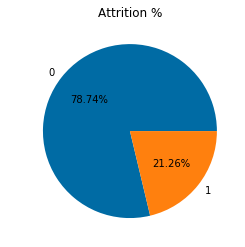

In [14]:
print("Pie chart showing the Target-Variable [Attrition_DV] ")
plt.style.use("tableau-colorblind10")
dat1['Attrition_DV'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title("Attrition %")
plt.ylabel(" ")

* **Attrition_DV** is binary category with 2 possible values: <br>
    1 - if student attrited <br>
    0 - if student return to college for 2nd Year
    <br><br>
* **21.26%** of students did not return in 2nd Year of college.

In [15]:
# Percentage of 0 & 1 in DV

print("**Attrition Percentages**")
round((dat1.Attrition_DV.value_counts()/dat1.shape[0])*100,2).rename(index= {0:'1. % of Students Returned:', 1:'2. % of Students Attrition:'})

**Attrition Percentages**


1. % of Students Returned:     78.74
2. % of Students Attrition:    21.26
Name: Attrition_DV, dtype: float64

### Descriptive Statistics:

In [16]:
# Insights on the costs required for the eductaion provided by the university:
print("**Insights on the costs required for the eductaion provided by the university**")
print(" ")
print("1. Minimum Financial need of Students is Rs" ,round(dat1['GROSS_FIN_NEED'].min(),2),".")
print("2. Average Financial need of Students is Rs" ,round(dat1['GROSS_FIN_NEED'].mean(),2),".")
print("3. Maximum Financial need of Students is Rs" ,round(dat1['GROSS_FIN_NEED'].max(),2),".")
print(" ")
print("4. Minimun course Fees is Rs" ,round(dat1['COST_OF_ATTEND'].min(),2),".")
print("5. Average course Fees is Rs" ,round(dat1['COST_OF_ATTEND'].mean(),2),".")
print("6. Maximum course Fees is Rs" ,round(dat1['COST_OF_ATTEND'].max(),2),".")
print(" ")
print("7. Minimum estimated Family contribution towards course fees is Rs",round(dat1['EST_FAM_CONTRIBUTION'].min(),2),".")
print("8. Average estimated Family contribution towards course fees is Rs",round(dat1['EST_FAM_CONTRIBUTION'].mean(),2),".")
print("9. Maximum estimated Family contribution towards course fees is Rs",round(dat1['EST_FAM_CONTRIBUTION'].max(),2),".")
print(" ")
print("10. Minimum unmet financial need of the student is Rs" ,round(dat1['UNMET_NEED'].min(),2),".")
print("11. Average unmet financial need of the student is Rs" ,round(dat1['UNMET_NEED'].mean(),2),".")
print("12. Maximum unmet financial need of the student is Rs" ,round(dat1['UNMET_NEED'].max(),2),".")

**Insights on the costs required for the eductaion provided by the university**
 
1. Minimum Financial need of Students is Rs 0 .
2. Average Financial need of Students is Rs 303402.51 .
3. Maximum Financial need of Students is Rs 2124900 .
 
4. Minimun course Fees is Rs 0 .
5. Average course Fees is Rs 551533.52 .
6. Maximum course Fees is Rs 2124900 .
 
7. Minimum estimated Family contribution towards course fees is Rs 0 .
8. Average estimated Family contribution towards course fees is Rs 344689.92 .
9. Maximum estimated Family contribution towards course fees is Rs 5999940 .
 
10. Minimum unmet financial need of the student is Rs -1212072.0 .
11. Average unmet financial need of the student is Rs 72220.52 .
12. Maximum unmet financial need of the student is Rs 1632660.0 .


In [17]:
# MEAN
print("**Below are the averages of the below mentioned variables**")
round(np.mean(dat1),2)

**Below are the averages of the below mentioned variables**


STUDENT IDENTIFIER          7897154.81
STDNT_AGE                        17.99
STDNT_TEST_ENTRANCE_COMB        997.76
RETURNED_2ND_YR                   0.79
DISTANCE_FROM_HOME               99.83
HIGH_SCHL_GPA                     3.20
FATHER_HI_EDU_CD                  2.56
MOTHER_HI_EDU_CD                  2.57
FIRST_TERM_ATTEMPT_HRS           13.99
FIRST_TERM_EARNED_HRS            12.20
SECOND_TERM_ATTEMPT_HRS          14.29
SECOND_TERM_EARNED_HRS           12.51
GROSS_FIN_NEED               303402.51
COST_OF_ATTEND               551533.52
EST_FAM_CONTRIBUTION         344689.92
UNMET_NEED                    72220.52
Attrition_DV                      0.21
dtype: float64

In [18]:
# VARIANCE
print("**Below are the variances of the below mentioned variables**")
np.var(dat1)

**Below are the variances of the below mentioned variables**


STUDENT IDENTIFIER          6.532248e+09
STDNT_AGE                   3.046713e-01
STDNT_TEST_ENTRANCE_COMB    2.069215e+04
RETURNED_2ND_YR             1.674283e-01
DISTANCE_FROM_HOME          5.489460e+04
HIGH_SCHL_GPA               2.040388e-01
FATHER_HI_EDU_CD            4.050246e-01
MOTHER_HI_EDU_CD            3.202821e-01
FIRST_TERM_ATTEMPT_HRS      2.415095e+00
FIRST_TERM_EARNED_HRS       8.915328e+00
SECOND_TERM_ATTEMPT_HRS     4.158830e+00
SECOND_TERM_EARNED_HRS      1.130040e+01
GROSS_FIN_NEED              2.338248e+11
COST_OF_ATTEND              3.676617e+11
EST_FAM_CONTRIBUTION        6.194823e+11
UNMET_NEED                  7.813523e+10
Attrition_DV                1.674283e-01
dtype: float64

In [19]:
# Skewness is a measure of asymmetry of a distribution:

print("**Below are the Skewness of the below mentioned variables**")
print(" ")
print("Student Age:                              ",round(skew(dat1['STDNT_AGE']),2))
print("Student Entrace Test:                     ",round(skew(dat1['STDNT_TEST_ENTRANCE_COMB']),2))
print("Distance from home:                       ",round(skew(dat1['DISTANCE_FROM_HOME']),2))
print("High school GPA:                          ",round(skew(dat1['HIGH_SCHL_GPA']),2))
print("Father's Hi_Edu:                          ",round(skew(dat1['FATHER_HI_EDU_CD']),2))
print("Mother's Hi_Edu:                          ",round(skew(dat1['MOTHER_HI_EDU_CD']),2))
print("Financial Need of student:                ",round(skew(dat1['GROSS_FIN_NEED']),2))
print("Course Fee:                               ",round(skew(dat1['COST_OF_ATTEND']),2))
print("Estimated Family contribution towards course fees:",round(skew(dat1['EST_FAM_CONTRIBUTION']),2))
print("Unmet financial need of the student:      ",round(skew(dat1['UNMET_NEED']),2))

**Below are the Skewness of the below mentioned variables**
 
Student Age:                               4.41
Student Entrace Test:                      -0.4
Distance from home:                        18.5
High school GPA:                           -0.25
Father's Hi_Edu:                           0.21
Mother's Hi_Edu:                           -0.07
Financial Need of student:                 1.24
Course Fee:                                0.35
Estimated Family contribution towards course fees: 3.81
Unmet financial need of the student:       0.67


In [20]:
# Kurtosis is a measure that describes the shape of a distribution:

print("**Below are the kurtosis of the below mentioned variables**")
round(dat1.kurtosis(),2)

**Below are the kurtosis of the below mentioned variables**


STUDENT IDENTIFIER           -1.18
STDNT_AGE                    50.85
STDNT_TEST_ENTRANCE_COMB      1.70
RETURNED_2ND_YR              -0.03
DISTANCE_FROM_HOME          416.42
HIGH_SCHL_GPA                 0.05
FATHER_HI_EDU_CD              0.10
MOTHER_HI_EDU_CD              0.16
FIRST_TERM_ATTEMPT_HRS       -0.33
FIRST_TERM_EARNED_HRS         1.14
SECOND_TERM_ATTEMPT_HRS       2.10
SECOND_TERM_EARNED_HRS        1.37
GROSS_FIN_NEED               -0.07
COST_OF_ATTEND               -1.71
EST_FAM_CONTRIBUTION         18.49
UNMET_NEED                    1.75
Attrition_DV                 -0.03
dtype: float64

## Crosstabs and Chi-square Test of Association (of 2 categorical variables):

* The **Chi-square test of independence** tests if there is a relationship between two categorical variables. 
* The data is usually displayed in a cross-tabulation format with each row representing a level (group) for one variable and each column representing a level (group) for another variable. 
* The test is comparing the observed observations to the expected observations.
* Other tests are 'g-test','fisher','mcnemar'.
<br>
<br>
1. **The H0 (Null Hypothesis)**: There is no relationship between variable one and variable two.
2. **The H1 (Alternative Hypothesis)**: There is a relationship between variable 1 and variable 2.
<br>
<br>
* If the **p-value** is significant, you can reject the null hypothesis and claim that the findings support the alternative hypothesis.



### Hypothesis for the below crosstabs between 2 categorical variables:

* H0 -> Both the variables are dependant
* H1 -> Both the variables are not dependant

In [21]:
# Crosstab of Student Gender vs Nationality:

print("**Crosstab of Student Gender vs Nationality**")
print(" ")
C1= pd.crosstab(dat1.STDNT_GENDER, dat1.INTERNATIONAL_STS,margins=True)
stats.chi2_contingency(C1)
table1, results1 = rp.crosstab(dat1.STDNT_GENDER, dat1.INTERNATIONAL_STS, prop= 'col', test= 'chi-square')

print("1. Division of Students as per Gender and Nationality.")
print(C1)
print(" ")
print("2. % Division of Students as per Gender and Nationality.")
print(table1)
print(" ")
print(results1)
print(" ")
print(" ")
print("**SUMMARY**")
def check_categorical_dependency(crosstab_table, confidence_interval):
    stat, p, dof, expected = stats.chi2_contingency(crosstab_table)
    print ("Chi-Square Statistic value = {}".format(stat))
    print ("P - Value = {}".format(p))
    alpha = 1.0 - confidence_interval
    if p <= alpha:
        print('Independent (reject H0)')
    else:
         print('Dependent (fail to reject H0)')
    return expected

exp_table_1 = check_categorical_dependency(C1, 0.95)

**Crosstab of Student Gender vs Nationality**
 
1. Division of Students as per Gender and Nationality.
INTERNATIONAL_STS     N   Y   All
STDNT_GENDER                     
F                  2122  18  2140
M                  1251   9  1260
All                3373  27  3400
 
2. % Division of Students as per Gender and Nationality.
             INTERNATIONAL_STS                
                             N       Y     All
STDNT_GENDER                                  
F                        62.91   66.67   62.94
M                        37.09   33.33   37.06
All                     100.00  100.00  100.00
 
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.1619
1                    p-value =    0.6874
2               Cramer's phi =    0.0069
 
 
**SUMMARY**
Chi-Square Statistic value = 0.1619446873262913
P - Value = 0.9968934459919511
Dependent (fail to reject H0)


In [22]:
# Crosstab of attrition to offcampus-oncampus students:
# (1<- attrited, 0<- returned) Assuming [1,0] are 2 categories:

print("**Crosstab of Attrition vs Housing status of the students**")
print(" ")
C2 = pd.crosstab(dat1.HOUSING_STS, dat1.Attrition_DV, margins=True).rename(columns={0:'Returned',1:'Attrited'})
stats.chi2_contingency(C2)
table2, results2 = rp.crosstab(dat1.HOUSING_STS, dat1.Attrition_DV, prop= 'col', test= 'chi-square')


print("1. Division of attrition to offcampus-oncampus students.")
print(C2)
print(" ")
print("2. % Division of attrition to offcampus-oncampus students.")
print(table2)
print(" ")
print(results2)
print(" ")
print(" ")
print("**SUMMARY**")
def check_categorical_dependency(crosstab_table, confidence_interval):
    stat, p, dof, expected = stats.chi2_contingency(crosstab_table)
    print ("Chi-Square Statistic value = {}".format(stat))
    print ("P - Value = {}".format(p))
    alpha = 1.0 - confidence_interval
    if p <= alpha:
        print('Independent (reject H0)')
    else:
         print('Dependent (fail to reject H0)')
    return expected

exp_table_2 = check_categorical_dependency(C2, 0.95)

**Crosstab of Attrition vs Housing status of the students**
 
1. Division of attrition to offcampus-oncampus students.
Attrition_DV  Returned  Attrited   All
HOUSING_STS                           
Off Campus        1592       389  1981
On Campus         1085       334  1419
All               2677       723  3400
 
2. % Division of attrition to offcampus-oncampus students.
            Attrition_DV               
                       0      1     All
HOUSING_STS                            
Off Campus         59.47   53.8   58.26
On Campus          40.53   46.2   41.74
All               100.00  100.0  100.00
 
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    7.5153
1                    p-value =    0.0061
2               Cramer's phi =    0.0470
 
 
**SUMMARY**
Chi-Square Statistic value = 7.515287902170632
P - Value = 0.11103704732854117
Dependent (fail to reject H0)


In [23]:
# Crosstab of attrition to different background of students:
# (1<- attrited, 0<- returned) Assuming [1,0] are 2 categories:

print("**Crosstab of Attrition vs Student Background**")
print(" ")
C3 = pd.crosstab(dat1.Attrition_DV, dat1.STDNT_BACKGROUND, margins=True).rename({0:'Returned',1:'Attrited'})
stats.chi2_contingency(C3)
table3, results3 = rp.crosstab(dat1.Attrition_DV, dat1.STDNT_BACKGROUND, prop= 'col', test= 'chi-square')


print("1. Division of attrition to different background of students.")
print(C3)
print(" ")
print("2. % Division of attrition to different background of students.")
print(table3)
print(" ")
print(results3)
print(" ")
print(" ")
print("**SUMMARY**")
def check_categorical_dependency(crosstab_table, confidence_interval):
    stat, p, dof, expected = stats.chi2_contingency(crosstab_table)
    print ("Chi-Square Statistic value = {}".format(stat))
    print ("P - Value = {}".format(p))
    alpha = 1.0 - confidence_interval
    if p <= alpha:
        print('Independent (reject H0)')
    else:
         print('Dependent (fail to reject H0)')
    return expected

exp_table_3 = check_categorical_dependency(C3, 0.95)

**Crosstab of Attrition vs Student Background**
 
1. Division of attrition to different background of students.
STDNT_BACKGROUND  BGD 1  BGD 2  BGD 3  BGD 4  BGD 5  BGD 6  BGD 7  BGD 8   All
Attrition_DV                                                                  
Returned           1605     82    777    113      4     80     12      4  2677
Attrited            477     24    170     26      4     14      7      1   723
All                2082    106    947    139      8     94     19      5  3400
 
2. % Division of attrition to different background of students.
             STDNT_BACKGROUND                                                 \
                        BGD 1   BGD 2   BGD 3   BGD 4  BGD 5   BGD 6   BGD 7   
Attrition_DV                                                                   
0                       77.09   77.36   82.05   81.29   50.0   85.11   63.16   
1                       22.91   22.64   17.95   18.71   50.0   14.89   36.84   
All                    100.

In [24]:
# Crosstab of attrition to degree group:
# (1<- attrited, 0<- returned) Assuming [1,0] are 2 categories:

print("**Crosstab of Attrition vs Degree**")
print(" ")
C4 = pd.crosstab(dat1.Attrition_DV, dat1.DEGREE_GROUP_DESC, margins=True).rename({0:'Returned',1:'Attrited'})
stats.chi2_contingency(C4)
table4, results4 = rp.crosstab(dat1.Attrition_DV, dat1.DEGREE_GROUP_DESC, prop= 'col', test= 'chi-square')


print("1. Division of attrition to degree group.")
print(C4)
print(" ")
print("2. % Division of attrition to degree group.")
print(table4)
print(" ")
print(results4)
print(" ")
print(" ")
print("SUMMARY")
def check_categorical_dependency(crosstab_table, confidence_interval):
    stat, p, dof, expected = stats.chi2_contingency(crosstab_table)
    print ("Chi-Square Statistic value = {}".format(stat))
    print ("P - Value = {}".format(p))
    alpha = 1.0 - confidence_interval
    if p <= alpha:
        print('Independent (reject H0)')
    else:
         print('Dependent (fail to reject H0)')
    return expected

exp_table_4 = check_categorical_dependency(C4, 0.95)

**Crosstab of Attrition vs Degree**
 
1. Division of attrition to degree group.
DEGREE_GROUP_DESC  Associate  Bachelors  Career Associate   All
Attrition_DV                                                   
Returned                  10       2664                 3  2677
Attrited                   2        720                 1   723
All                       12       3384                 4  3400
 
2. % Division of attrition to degree group.
             DEGREE_GROUP_DESC                                   
                     Associate Bachelors Career Associate     All
Attrition_DV                                                     
0                        83.33     78.72             75.0   78.74
1                        16.67     21.28             25.0   21.26
All                     100.00    100.00            100.0  100.00
 
                Chi-square test  results
0  Pearson Chi-square ( 2.0) =    0.1851
1                    p-value =    0.9116
2                 Cramer's V =   

In [25]:
# Crosstab of attrition to Entrance_Test_Decile bins:
# (1<- attrited, 0<- returned) Assuming [1,0] are 2 categories:

print("**Crosstab of Attrition vs Entrance_Test_Decile**")
print(" ")
C5 = pd.crosstab(dat1.Attrition_DV, dat1.Entrance_Test_Decile, margins=True).rename({0:'Returned',1:'Attrited'})
stats.chi2_contingency(C5)
table5, results5 = rp.crosstab(dat1.Attrition_DV, dat1.Entrance_Test_Decile, prop= 'col', test= 'chi-square')


print("1. Division of attrition to Decile Bins.")
print(C5)
print(" ")
print("2. % Division of attrition to Decile Bins.")
print(table5)
print(" ")
print(results5)
print(" ")
print(" ")
print("**SUMMARY**")
def check_categorical_dependency(crosstab_table, confidence_interval):
    stat, p, dof, expected = stats.chi2_contingency(crosstab_table)
    print ("Chi-Square Statistic value = {}".format(stat))
    print ("P - Value = {}".format(p))
    alpha = 1.0 - confidence_interval
    if p <= alpha:
        print('Independent (reject H0)')
    else:
         print('Dependent (fail to reject H0)')
    return expected

exp_table_5 = check_categorical_dependency(C5, 0.95)

**Crosstab of Attrition vs Entrance_Test_Decile**
 
1. Division of attrition to Decile Bins.
Entrance_Test_Decile  Very Poor  Poor  Average  Smart  Outstanding   All
Attrition_DV                                                            
Returned                    701   576      399    556          445  2677
Attrited                    177   158      119    158          111   723
All                         878   734      518    714          556  3400
 
2. % Division of attrition to Decile Bins.
             Entrance_Test_Decile                                            
                        Very Poor    Poor Average   Smart Outstanding     All
Attrition_DV                                                                 
0                           79.84   78.47   77.03   77.87       80.04   78.74
1                           20.16   21.53   22.97   22.13       19.96   21.26
All                        100.00  100.00  100.00  100.00      100.00  100.00
 
                Chi-square 

### Grouped tables

In [26]:
# (1<- attrited, 0<- returned) Assuming [1,0] are 2 categories:

print("**Attrition VS Differnt Costs**")
dat1.groupby('Attrition_DV')[['COST_OF_ATTEND','GROSS_FIN_NEED','EST_FAM_CONTRIBUTION','UNMET_NEED']].agg({'COST_OF_ATTEND':sum,'GROSS_FIN_NEED':sum,'EST_FAM_CONTRIBUTION':sum,'UNMET_NEED':sum}).rename({0:'Returned',1:'Attrited'})

**Attrition VS Differnt Costs**


,COST_OF_ATTEND,GROSS_FIN_NEED,EST_FAM_CONTRIBUTION,UNMET_NEED
Attrition_DV,,,,
Returned,1478263680,809431740,944008680,179988505.8
Attrited,396950280,222136782,227937060,65561250.0


In [27]:
# (1<- attrited, 0<- returned) Assuming [1,0] are 2 categories:

dat1.groupby('Attrition_DV')[['HIGH_SCHL_GPA','FATHER_HI_EDU_CD','MOTHER_HI_EDU_CD']].agg({'HIGH_SCHL_GPA':np.mean,'FATHER_HI_EDU_CD':np.mean,'MOTHER_HI_EDU_CD':np.mean}).rename({0:'Returned',1:'Attrited'})

,HIGH_SCHL_GPA,FATHER_HI_EDU_CD,MOTHER_HI_EDU_CD
Attrition_DV,,,
Returned,3.221498,2.568342,2.579413
Attrited,3.133273,2.532153,2.541172


### Quantiles

1. **Quantiles** are points in a distribution that relate to the rank order of values in that distribution.  
2. **Percentiles** are descriptions of quantiles relative to 100; so the 75th percentile (upper quartile) is 75% or three quarters of the way up an ascending list of sorted values of a sample.

In [28]:
# Quantile division of the Student entrance test marks

print("**Quantile division of the Student entrance test marks**")
round(dat1['STDNT_TEST_ENTRANCE_COMB'].quantile([.01,.05,.25,.5,.75,.99,1]),2)

**Quantile division of the Student entrance test marks**


0.01     530.00
0.05     790.00
0.25     910.00
0.50     997.76
0.75    1070.00
0.99    1340.00
1.00    1510.00
Name: STDNT_TEST_ENTRANCE_COMB, dtype: float64

In [29]:
#Quantile division of the High school GPA

print("**Quantile division of the High school GPA**")
round(dat1['HIGH_SCHL_GPA'].quantile([.01,.05,.25,.5,.75,.99,1]),2)

**Quantile division of the High school GPA**


0.01    2.18
0.05    2.46
0.25    2.87
0.50    3.20
0.75    3.55
0.99    4.00
1.00    4.00
Name: HIGH_SCHL_GPA, dtype: float64

In [30]:
#Quantile division of Gross Finance need of the students

print("**Quantile division of Gross Finance need of the students**")
round(dat1['GROSS_FIN_NEED'].quantile([.5,.6,.75,.8,.99,1]),2)

**Quantile division of Gross Finance need of the students**


0.50          0.0
0.60          0.0
0.75     599580.0
0.80     841212.0
0.99    1418100.0
1.00    2124900.0
Name: GROSS_FIN_NEED, dtype: float64

In [31]:
#Quantile division of Course fees

print("**Quantile division of Course fees**")
round(dat1['COST_OF_ATTEND'].quantile([.25,.5,.6,.75,.8,.99,1]),2)

**Quantile division of Course fees**


0.25          0.0
0.50     150540.0
0.60     902760.0
0.75    1192815.0
0.80    1264860.0
0.99    1489080.0
1.00    2124900.0
Name: COST_OF_ATTEND, dtype: float64

In [32]:
#Quantile division of estimated Family contribution

print("**Quantile division of estimated Family contribution**")
round(dat1['EST_FAM_CONTRIBUTION'].quantile([.6,.75,.8,.99,1]),2)

**Quantile division of estimated Family contribution**


0.60          0.0
0.75     324180.0
0.80     525996.0
0.99    3905646.6
1.00    5999940.0
Name: EST_FAM_CONTRIBUTION, dtype: float64

In [33]:
#Quantile division of Unmet financial need

print("**Quantile division of Unmet financial need**")
round(dat1['UNMET_NEED'].quantile([.6,.75,.8,.99,1]),2)

**Quantile division of Unmet financial need**


0.60          0.0
0.75     187615.5
0.80     293340.0
0.99     883023.6
1.00    1632660.0
Name: UNMET_NEED, dtype: float64

### Correlations among all continuous variables:

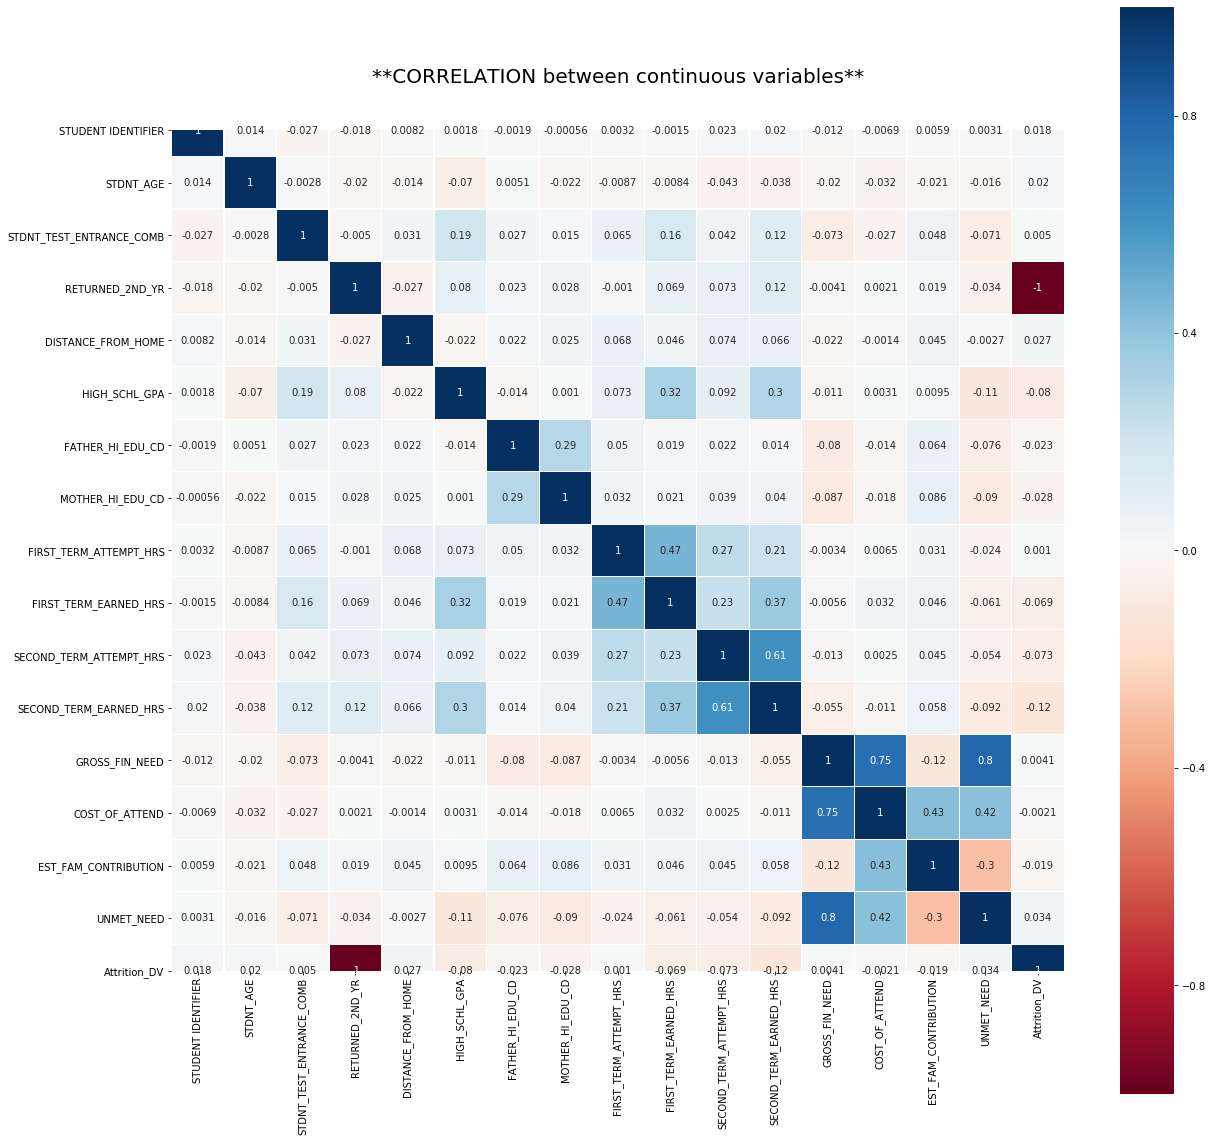

In [34]:
#Correlation of all the numerical variables

# Darker the col stronger the correlation 
# Weaker the col Weaker the correlation 

colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
plt.title('**CORRELATION between continuous variables**', y=1.05, size=20)
#corr1 = dat1.corr()
sns.heatmap(dat1.corr(), linewidths=0.1,vmax=1.0,square=True,linecolor='white',cmap=colormap, annot=True)

In [35]:
print("Top 10 positively correlated variables")
print(dat1.corr().unstack().sort_values(ascending=False).drop_duplicates().head(10))
print(" ")
print("Top 10 Negetively correlated variables")
print(dat1.corr().unstack().sort_values(ascending=False).drop_duplicates().tail(10))

Top 10 positively correlated variables
Attrition_DV             Attrition_DV              1.000000
GROSS_FIN_NEED           UNMET_NEED                0.796079
COST_OF_ATTEND           GROSS_FIN_NEED            0.751042
SECOND_TERM_ATTEMPT_HRS  SECOND_TERM_EARNED_HRS    0.612434
FIRST_TERM_ATTEMPT_HRS   FIRST_TERM_EARNED_HRS     0.466185
COST_OF_ATTEND           EST_FAM_CONTRIBUTION      0.428460
                         UNMET_NEED                0.418546
FIRST_TERM_EARNED_HRS    SECOND_TERM_EARNED_HRS    0.367299
                         HIGH_SCHL_GPA             0.322201
SECOND_TERM_EARNED_HRS   HIGH_SCHL_GPA             0.299755
dtype: float64
 
Top 10 Negetively correlated variables
Attrition_DV            HIGH_SCHL_GPA            -0.079919
FATHER_HI_EDU_CD        GROSS_FIN_NEED           -0.080486
MOTHER_HI_EDU_CD        GROSS_FIN_NEED           -0.087462
UNMET_NEED              MOTHER_HI_EDU_CD         -0.089791
SECOND_TERM_EARNED_HRS  UNMET_NEED               -0.092042
UNMET_NEED

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


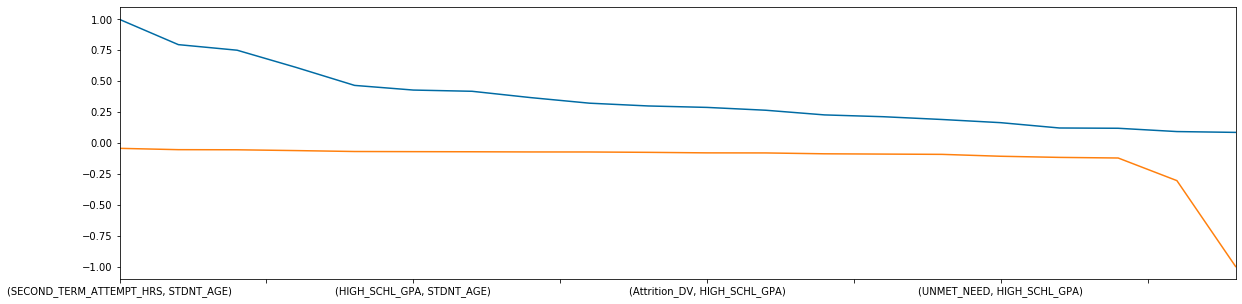

In [36]:
p = dat1.corr().unstack().sort_values(ascending=False).drop_duplicates().head(20)
p1 = dat1.corr().unstack().sort_values(ascending=False).drop_duplicates().tail(20)

plt.figure(figsize=(20,5))
print(p.plot())
print(p1.plot())

### Univariate Analysis
*  Categorical variables

Pie chart showing Student Gender


Text(0, 0.5, ' ')

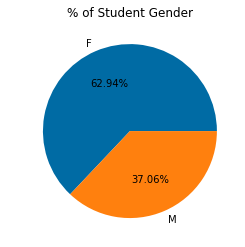

In [37]:
print("Pie chart showing Student Gender")
plt.style.use("tableau-colorblind10")
dat1['STDNT_GENDER'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title("% of Student Gender")
plt.ylabel(" ")

* In the university <br>
    62.94% are **Female** Students <br>
    37.06% are **Male** Students

Pie chart showing International Students


Text(0, 0.5, ' ')

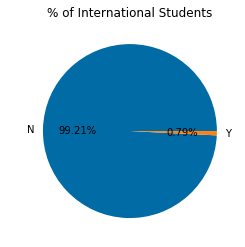

In [38]:
print("Pie chart showing International Students")
plt.style.use("tableau-colorblind10")
dat1['INTERNATIONAL_STS'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title("% of International Students")
plt.ylabel(" ")

* In the university <br>
    0.79% are **International** Students <br>
    99.21% are **In-state** Students

Pie chart showing Housing Status of Students


Text(0, 0.5, ' ')

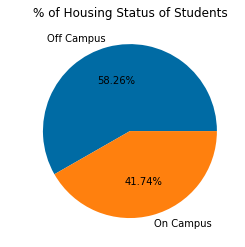

In [39]:
print("Pie chart showing Housing Status of Students")
plt.style.use("tableau-colorblind10")
dat1['HOUSING_STS'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title("% of Housing Status of Students")
plt.ylabel(" ")

* In the university <br>
    58.26% Students stay **Off-Campus** <br>
    41.74% Students stay **On-Campus**

In [40]:
sb = dat1.groupby('STDNT_BACKGROUND')['STDNT_BACKGROUND'].count().sort_values(ascending=False)
sb1= round(sb/dat1.shape[0],3)*100
print(sb)
print(" ")
print(sb1)

STDNT_BACKGROUND
BGD 1    2082
BGD 3     947
BGD 4     139
BGD 2     106
BGD 6      94
BGD 7      19
BGD 5       8
BGD 8       5
Name: STDNT_BACKGROUND, dtype: int64
 
STDNT_BACKGROUND
BGD 1    61.2
BGD 3    27.9
BGD 4     4.1
BGD 2     3.1
BGD 6     2.8
BGD 7     0.6
BGD 5     0.2
BGD 8     0.1
Name: STDNT_BACKGROUND, dtype: float64


Text(3.8, 0.01, '5 (0.1%)')

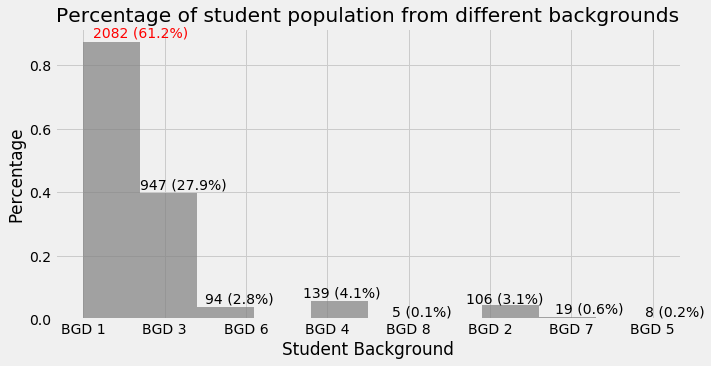

In [41]:
# Percentage of student population from different backgrounds.

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.hist(dat1['STDNT_BACKGROUND'],histtype ='bar' ,align='mid', density=True, color='grey',alpha=0.7)
plt.title('Percentage of student population from different backgrounds', loc='center')
plt.xlabel('Student Background')
plt.rcParams['xtick.labelsize']=10
plt.ylabel('Percentage')
plt.rcParams['ytick.labelsize']=10

plt.text(0.12, 0.89, '2082 (61.2%)', color='red')
plt.text(0.7, 0.41, '947 (27.9%)', color='black')
plt.text(2.7, 0.07, '139 (4.1%)', color='black')
plt.text(4.7, 0.05, '106 (3.1%)', color='black')
plt.text(1.5, 0.05, '94 (2.8%)', color='black')
plt.text(5.8, 0.02, '19 (0.6%)', color='black')
plt.text(6.9, 0.01, '8 (0.2%)', color='black')
plt.text(3.8, 0.01, '5 (0.1%)', color='black')

In [42]:
dg = dat1.groupby('DEGREE_GROUP_DESC')['DEGREE_GROUP_DESC'].count().sort_values(ascending=False)
dg1 = round(dg/dat1.shape[0],4)
print(dg)
print(" ")
print(dg1)

# Since maximum students apply for bachelor-degree (99%), the attrition% for bachelor students
print(" ")
DA = dat1['DEGREE_GROUP_DESC'][(dat1['DEGREE_GROUP_DESC'] == 'Bachelors') & (dat1['Attrition_DV'] >=1)].count()
DA1 = round(DA/dat1.shape[0],3)*100
print("1. Total No. of Bachelor students who attrite are", DA)
print("2. Total percentage of Bachelor students who attrite are", DA1,"%")

DEGREE_GROUP_DESC
Bachelors           3384
Associate             12
Career Associate       4
Name: DEGREE_GROUP_DESC, dtype: int64
 
DEGREE_GROUP_DESC
Bachelors           0.9953
Associate           0.0035
Career Associate    0.0012
Name: DEGREE_GROUP_DESC, dtype: float64
 
1. Total No. of Bachelor students who attrite are 720
2. Total percentage of Bachelor students who attrite are 21.2 %


Text(1.85, 4, '4')

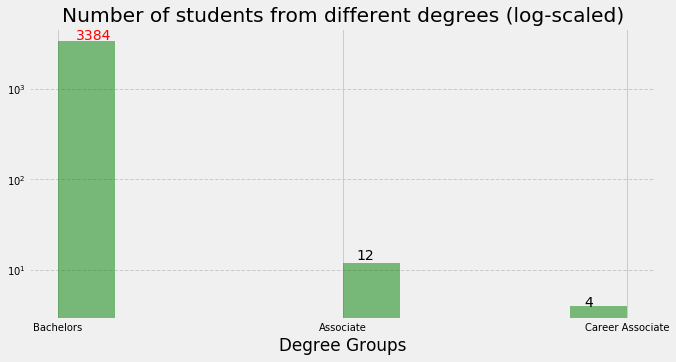

In [43]:
# Number of students from different degrees (log-scale).

plt.figure(figsize=(10,5))
p1= plt.hist(dat1['DEGREE_GROUP_DESC'], log=True, align='mid', color='green',alpha=0.5)
plt.title('Number of students from different degrees (log-scaled)', loc='center')
plt.grid(axis = 'y', linestyle = '--')
plt.xlabel('Degree Groups')
plt.rcParams['xtick.labelsize']=10
plt.style.use('fivethirtyeight')


plt.text(0.065, 3500, '3384', color='red')
plt.text(1.05, 13, '12', color='black')
plt.text(1.85, 4, '4', color='black')

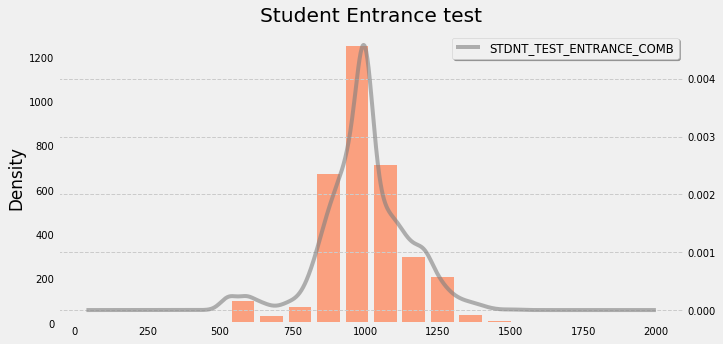

In [44]:
plt.figure(figsize=(10,5))
plt.hist(dat1.STDNT_TEST_ENTRANCE_COMB, bins=10 , range= (530,1510),align='mid',rwidth= 0.8, color = 'coral', alpha= 0.7)
dat1.STDNT_TEST_ENTRANCE_COMB.plot(kind='density', secondary_y=True, color='grey',alpha=0.6)
plt.title(label='Student Entrance test', loc='center', pad=10)
plt.legend(loc='best',ncol = 100 ,fontsize = 'small', shadow= True )
plt.xlabel('Entrance Test Marks')
plt.grid(axis = 'y', linestyle = '--')
plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10

### Bivariate Analysis
* Understanding Relationships between 1 catvar & 1 convar:

In [45]:
# Max Course Fee paid by students of different background

sb= dat1.groupby("STDNT_BACKGROUND")['COST_OF_ATTEND'].max().sort_values(ascending=False)
sb

STDNT_BACKGROUND
BGD 1    2124900
BGD 3    1862040
BGD 7    1504980
BGD 6    1504980
BGD 4    1504980
BGD 2    1504980
BGD 8    1418100
BGD 5          0
Name: COST_OF_ATTEND, dtype: int64

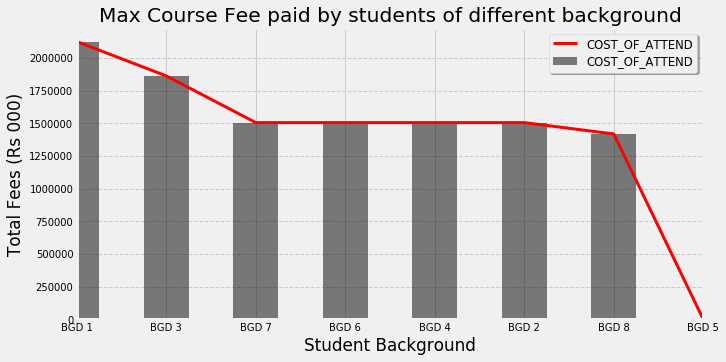

In [46]:
plt.figure(figsize=(10,5))
sb.plot.bar(rot=0,color='black', alpha=0.5)
sb.plot(linewidth = 3, color='red')
plt.title('Max Course Fee paid by students of different background', loc='center')
plt.grid(axis = 'y', linestyle = '--')
plt.legend(loc='best',fontsize = 'small', shadow= True, markerfirst = True)
plt.xlabel('Student Background')
plt.rcParams['xtick.labelsize']=10
plt.ylabel('Total Fees (Rs 000)')
plt.rcParams['ytick.labelsize']=10
plt.style.use('fivethirtyeight')

In [47]:
# Max Course Fee paid by students who applied for different degree

dg = dat1.groupby("DEGREE_GROUP_DESC")['COST_OF_ATTEND'].max().sort_values(ascending=False)
dg

DEGREE_GROUP_DESC
Bachelors           2124900
Associate           1285860
Career Associate    1270680
Name: COST_OF_ATTEND, dtype: int64

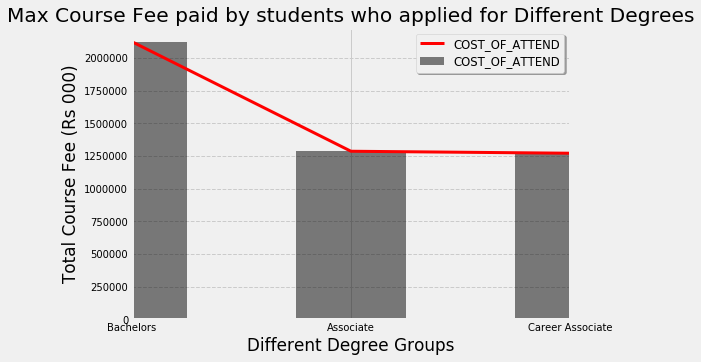

In [48]:
plt.figure(figsize=(7,5))
dg.plot.bar(rot=0, color='black', alpha=0.5)
dg.plot(linewidth = 3, color='red')
plt.title('Max Course Fee paid by students who applied for Different Degrees', loc='center')
plt.grid(axis = 'y', linestyle = '--')
plt.legend(loc='best',fontsize = 'small', shadow= True, markerfirst = True)
plt.xlabel('Different Degree Groups')
plt.rcParams['xtick.labelsize']=10
plt.ylabel('Total Course Fee (Rs 000)')
plt.rcParams['ytick.labelsize']=10
plt.style.use('fivethirtyeight')

In [49]:
# Max Course Fee paid by oncampus/offcampus students:

hs = dat1.groupby("HOUSING_STS")['COST_OF_ATTEND'].max().sort_values(ascending=False)
hs1 =dat1.groupby("HOUSING_STS")['GROSS_FIN_NEED'].max().sort_values(ascending=False)
hs2 =dat1.groupby("HOUSING_STS")['UNMET_NEED'].max().sort_values(ascending=False) 
print("(hs): Maximum Course Fees paid as per Housing Status of the students (Rs)")
print(hs)
print(" ")
print("(hs1): Maximum Financial needs of Student (Rs)")
print(hs1)
print(" ")
print("(hs2): Maximum Unmet Financial needs of Student (Rs)")
print(hs2)

(hs): Maximum Course Fees paid as per Housing Status of the students (Rs)
HOUSING_STS
Off Campus    2124900
On Campus     2082900
Name: COST_OF_ATTEND, dtype: int64
 
(hs1): Maximum Financial needs of Student (Rs)
HOUSING_STS
Off Campus    2124900
On Campus     1933800
Name: GROSS_FIN_NEED, dtype: int64
 
(hs2): Maximum Unmet Financial needs of Student (Rs)
HOUSING_STS
On Campus     1632660.0
Off Campus    1478400.0
Name: UNMET_NEED, dtype: float64


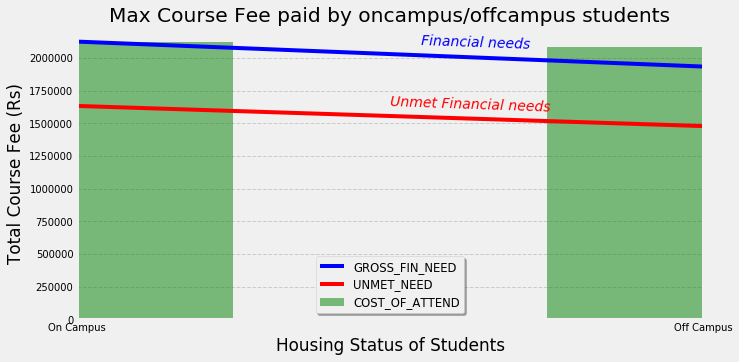

In [50]:
angle = -2

plt.figure(figsize=(10,5))
hs.plot.bar(rot=0, color= 'green', alpha=0.5)
hs1.plot(color='blue')
hs2.plot(color='red')
plt.legend(loc='best',fontsize = 'small',shadow= True, markerfirst = True)
plt.title('Max Course Fee paid by oncampus/offcampus students', loc='center')
plt.xlabel('Housing Status of Students')
plt.ylabel('Total Course Fee (Rs)')
plt.grid(axis = 'y', linestyle = '--')
plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10
plt.text(0.55, 2100000, 'Financial needs', color='blue' ,style='italic', rotation=angle, rotation_mode='anchor')
plt.text(0.5, 1632660, 'Unmet Financial needs', color='red'  ,style='italic',  rotation=angle, rotation_mode='anchor')
plt.style.use('fivethirtyeight')

1. Total no. of subjects available to apply for Major to students in the university: 54


Text(9, 100, '98')

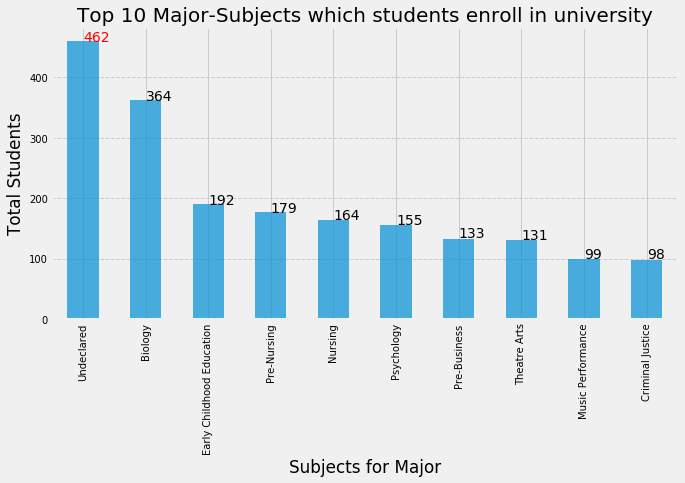

In [51]:
plt.figure(figsize=(10,5))
sm = dat1.groupby('STDNT_MAJOR')['STDNT_MAJOR'].count().sort_values(ascending=False)
sm1=sm.nlargest(10)

print("1. Total no. of subjects available to apply for Major to students in the university:", len(sm))

sm1.plot.bar(alpha=0.7)
plt.title('Top 10 Major-Subjects which students enroll in university', loc='center', fontdict= {'fontsize':20})
plt.xlabel('Subjects for Major')
plt.ylabel('Total Students')
plt.grid(axis = 'y', linestyle = '--')
plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10
plt.style.use('fivethirtyeight')

plt.text(0, 460, '462', color='red')
plt.text(1, 362, '364', color='black')
plt.text(2, 190, '192', color='black')
plt.text(3, 177, '179', color='black')
plt.text(4, 166, '164', color='black')
plt.text(5, 157, '155', color='black')
plt.text(6, 135, '133', color='black')
plt.text(7, 133, '131', color='black')
plt.text(8, 101, '99', color='black')
plt.text(9, 100, '98', color='black')

Text(9, 0.6, '0.53%')

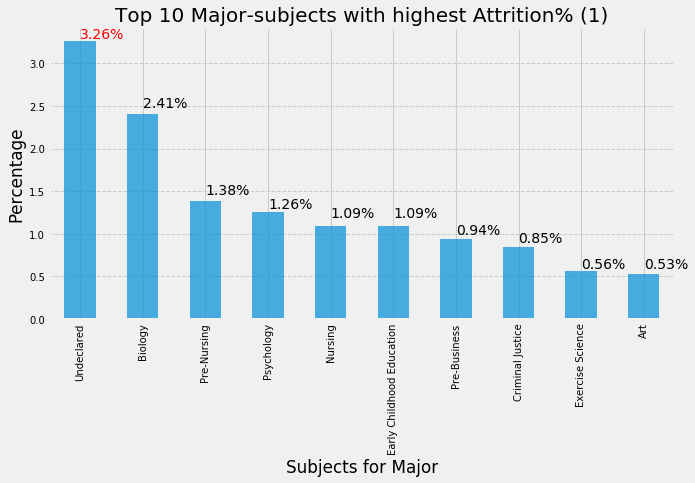

In [52]:
AR=dat1.groupby(by= ['STDNT_MAJOR']).apply(lambda g: g[g['Attrition_DV'] == 1])
AR1= (round(AR['STDNT_MAJOR'].value_counts()/dat1.shape[0],4)*100).sort_values(ascending=False)
ARL = AR1.nlargest(10)

plt.figure(figsize=(10,5))
ARL.plot(kind='bar',rot=90, fontsize=10, alpha=0.7)
plt.title('Top 10 Major-subjects with highest Attrition% (1)', loc='center', fontdict= {'fontsize':20})
plt.xlabel('Subjects for Major')
plt.ylabel('Percentage')
plt.grid(axis = 'y', linestyle = '--')
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=10
plt.style.use('fivethirtyeight')

plt.text(0, 3.3, '3.26%', color='red')
plt.text(1, 2.49, '2.41%', color='black')
plt.text(2, 1.47, '1.38%', color='black')
plt.text(3, 1.3, '1.26%', color='black')
plt.text(4, 1.2,'1.09%', color='black')
plt.text(5, 1.2,'1.09%', color='black')
plt.text(6, 1,  '0.94%', color='black')
plt.text(7, 0.9,  '0.85%', color='black')
plt.text(8, 0.6,  '0.56%', color='black')
plt.text(9, 0.6,  '0.53%', color='black')

Text(2, 0, '0.03%')

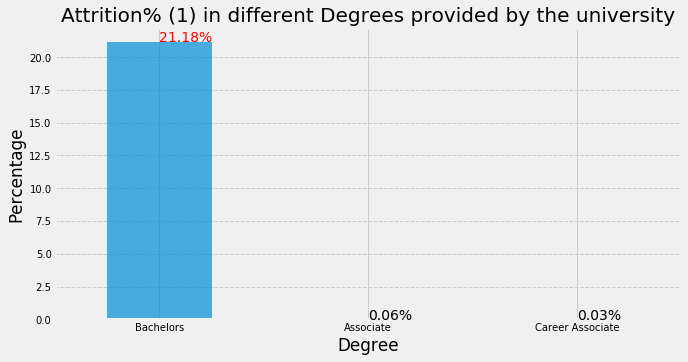

In [53]:
DGA = dat1.groupby(by= ['DEGREE_GROUP_DESC']).apply(lambda g: g[g['Attrition_DV'] == 1])
DGA1= (round(DGA['DEGREE_GROUP_DESC'].value_counts()/dat1.shape[0],4)*100).sort_values(ascending=False)

plt.figure(figsize=(10,5))
DGA1.plot(kind='bar',rot= 0, fontsize=10, alpha=0.7)
plt.title('Attrition% (1) in different Degrees provided by the university', loc='center', fontdict= {'fontsize':20})
plt.xlabel('Degree')
plt.ylabel('Percentage')
plt.grid(axis = 'y', linestyle = '--')
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=10
plt.style.use('fivethirtyeight')

plt.text(0, 21.2, '21.18%', color='red')
plt.text(1, 0, '0.06%', color='black')
plt.text(2, 0, '0.03%', color='black')

Text(4, 1, '0.76%')

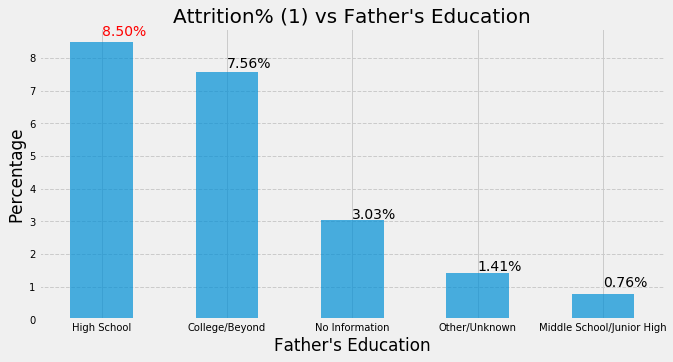

In [54]:
FHE = dat1.groupby(by= ['FATHER_HI_EDU_DESC']).apply(lambda g: g[g['Attrition_DV'] == 1])
FHE1= (round(FHE['FATHER_HI_EDU_DESC'].value_counts()/dat1.shape[0],4)*100).sort_values(ascending=False)

plt.figure(figsize=(10,5))
FHE1.plot(kind='bar',rot= 0, fontsize=10, alpha=0.7)
plt.title( "Attrition% (1) vs Father's Education" , loc='center', fontdict= {'fontsize':20})
plt.xlabel( "Father's Education")
plt.ylabel('Percentage')
plt.grid(axis = 'y', linestyle = '--')
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=10
plt.style.use('fivethirtyeight')

plt.text(0, 8.7, '8.50%', color='red')
plt.text(1, 7.7, '7.56%', color='black')
plt.text(2, 3.09, '3.03%', color='black')
plt.text(3, 1.5, '1.41%', color='black')
plt.text(4, 1, '0.76%', color='black')

Text(4, 0.7, '0.47%')

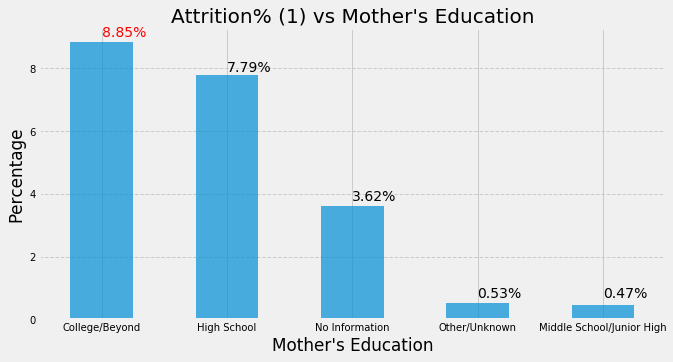

In [55]:
MHE = dat1.groupby(by= ['MOTHER_HI_EDU_DESC']).apply(lambda g: g[g['Attrition_DV'] == 1])
MHE1= (round(MHE['MOTHER_HI_EDU_DESC'].value_counts()/dat1.shape[0],4)*100).sort_values(ascending=False)

plt.figure(figsize=(10,5))
MHE1.plot(kind='bar',rot= 0, fontsize=10, alpha=0.7)
plt.title( "Attrition% (1) vs Mother's Education" , loc='center', fontdict= {'fontsize':20})
plt.xlabel( "Mother's Education")
plt.ylabel('Percentage')
plt.grid(axis = 'y', linestyle = '--')
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=10
plt.style.use('fivethirtyeight')

plt.text(0, 9, '8.85%', color='red')
plt.text(1, 7.9, '7.79%', color='black')
plt.text(2, 3.8, '3.62%', color='black')
plt.text(3, 0.7, '0.53%', color='black')
plt.text(4, 0.7, '0.47%', color='black')

Text(7, 0.09, '0.03%')

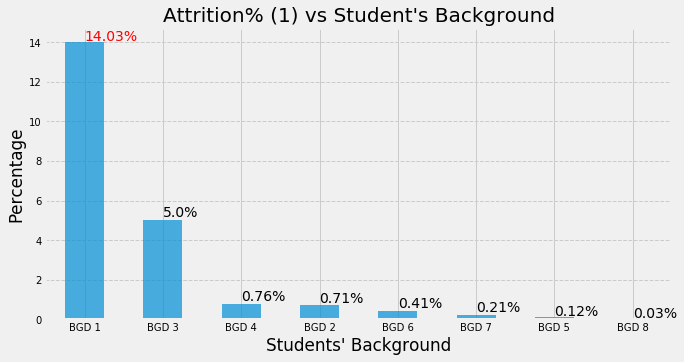

In [56]:
SBG = dat1.groupby(by= ['STDNT_BACKGROUND']).apply(lambda g: g[g['Attrition_DV'] == 1])
SBG1= (round(SBG['STDNT_BACKGROUND'].value_counts()/dat1.shape[0],4)*100).sort_values(ascending=False)

plt.figure(figsize=(10,5))
SBG1.plot(kind='bar',rot= 0, fontsize=10, alpha=0.7)
plt.title( "Attrition% (1) vs Student's Background" , loc='center', fontdict= {'fontsize':20})
plt.xlabel( "Students' Background")
plt.ylabel('Percentage')
plt.grid(axis = 'y', linestyle = '--')
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=10
plt.style.use('fivethirtyeight')

plt.text(0, 14.06,   '14.03%', color='red')
plt.text(1, 5.2, '5.0%', color='black')
plt.text(2, 0.95, '0.76%', color='black')
plt.text(3, 0.85, '0.71%', color='black')
plt.text(4, 0.62, '0.41%', color='black')
plt.text(5, 0.39, '0.21%', color='black')
plt.text(6, 0.2, '0.12%', color='black')
plt.text(7, 0.09, '0.03%', color='black')

Text(1, 7.5, '7.29%')

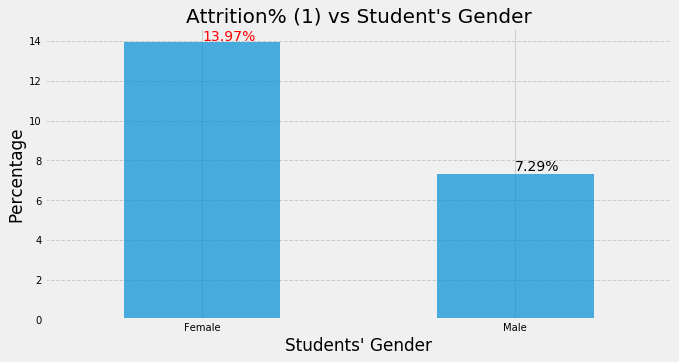

In [57]:
SG = dat1.groupby(by= ['STDNT_GENDER']).apply(lambda g: g[g['Attrition_DV'] == 1])
SG1= (round(SG['STDNT_GENDER'].value_counts()/dat1.shape[0],4)*100).sort_values(ascending=False)

plt.figure(figsize=(10,5))
ax1 = SG1.plot(kind='bar',rot= 0, fontsize=10, alpha=0.7)
plt.title( "Attrition% (1) vs Student's Gender" , loc='center', fontdict= {'fontsize':20})
plt.xlabel( "Students' Gender")
plt.ylabel('Percentage')
plt.grid(axis = 'y', linestyle = '--')
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=10
plt.style.use('fivethirtyeight')

GL1 = ['Female', 'Male']
ax1.set_xticklabels(GL1)

plt.text(0, 14,'13.97%', color='red')
plt.text(1, 7.5, '7.29%', color='black')

Text(1, 0.5, '0.35%')

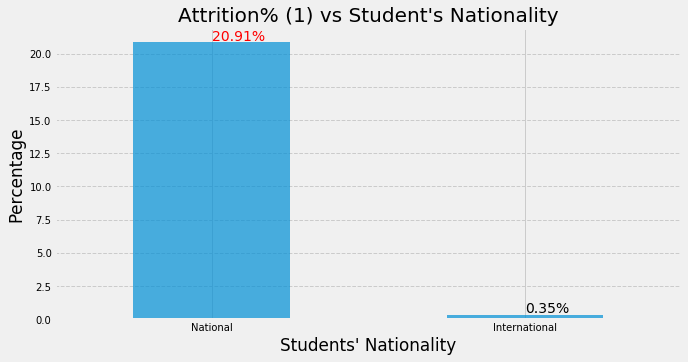

In [58]:
IS = dat1.groupby(by= ['INTERNATIONAL_STS']).apply(lambda g: g[g['Attrition_DV'] == 1]).rename(columns={'N': 'National', 'Y':'International'})
IS1= (round(IS['INTERNATIONAL_STS'].value_counts()/dat1.shape[0],4)*100).sort_values(ascending=False)

plt.figure(figsize=(10,5))
ax = IS1.plot(kind='bar',rot= 0, fontsize=10, alpha=0.7)
plt.title( "Attrition% (1) vs Student's Nationality" , loc='center', fontdict= {'fontsize':20})
plt.xlabel( "Students' Nationality")
plt.ylabel('Percentage')
plt.grid(axis = 'y', linestyle = '--')
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=10
plt.style.use('fivethirtyeight')

group_labels = ['National', 'International']
ax.set_xticklabels(group_labels)

plt.text(0, 21,'20.91%', color='red')
plt.text(1, 0.5, '0.35%', color='black')

Skew in the data: -0.396


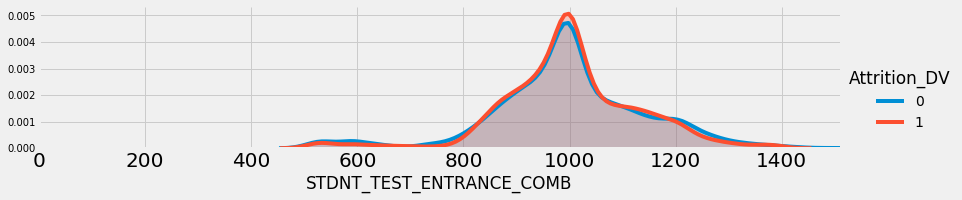

In [59]:
# plot distribution Students Entrance Test vs Attrition

a = sns.FacetGrid(dat1, hue = 'Attrition_DV', aspect=4 )
a.map(sns.kdeplot, 'STDNT_TEST_ENTRANCE_COMB', shade= True )
a.set(xlim=(0 , dat1['STDNT_TEST_ENTRANCE_COMB'].max()))
a.add_legend()

print('Skew in the data:',round(dat1.STDNT_TEST_ENTRANCE_COMB.skew(),3))

**Pair Plots**


C:\Users\home\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


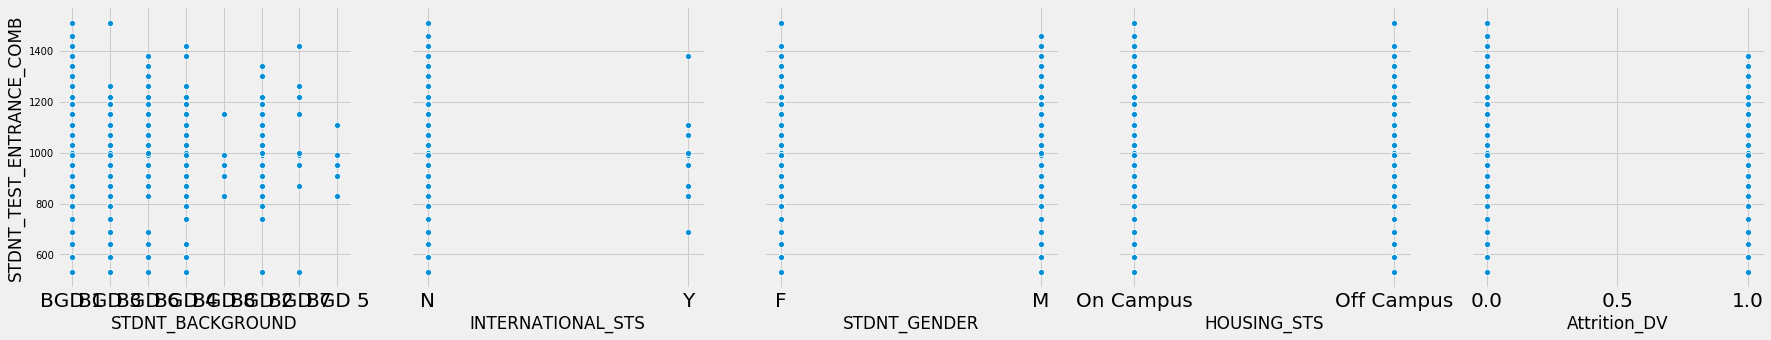

In [60]:
print("**Pair Plots**")
sns.pairplot(dat1, x_vars= ['STDNT_BACKGROUND', 'INTERNATIONAL_STS','STDNT_GENDER','HOUSING_STS','Attrition_DV'], y_vars='STDNT_TEST_ENTRANCE_COMB', size = 5, kind='scatter' )

In [61]:
# Average markes scored by students in Entrance Test, in different Major-subjects:

ST = dat1.groupby(by= ['STDNT_MAJOR']).agg({'STDNT_TEST_ENTRANCE_COMB':np.mean}).sort_values(by= 'STDNT_TEST_ENTRANCE_COMB' ,ascending= False)
STL = round(ST,2).rename(columns={'STDNT_TEST_ENTRANCE_COMB':'Avg Marks'}).nlargest(10, columns= ['Avg Marks'])
STS = round(ST,2).rename(columns={'STDNT_TEST_ENTRANCE_COMB':'Avg Marks'}).nsmallest(10, columns= ['Avg Marks'])
print("**Top 10 Major-Subjects with highest Average markes scored by students in Entrance Test**")
print(STL)
print(" ")
print("**Last 10 Major-Subjects with lowest Average markes scored by students in Entrance Test**")
print(STS)

**Top 10 Major-Subjects with highest Average markes scored by students in Entrance Test**
                              Avg Marks
STDNT_MAJOR                            
Liberal Arts                    1260.00
Early Admission - Accel         1236.67
French                          1146.94
French with Teacher Cert        1089.44
English and Secondary Ed        1086.03
Mathematics and Secondary Ed    1078.89
Biology and Secondary Ed        1070.00
Music Education                 1066.71
Computer Science - Games        1060.33
Theatre Arts                    1058.00
 
**Last 10 Major-Subjects with lowest Average markes scored by students in Entrance Test**
                                Avg Marks
STDNT_MAJOR                              
Spec Ed: Gen. Curr. - Reading      898.29
Spanish                            923.55
Health and Physical Education      941.05
Middle Grades Education            944.77
Management Information Systems     948.04
Health Science                     951.92
Ex

In [62]:
# Average markes scored by students in Entrance Test, in different Minor-subjects:

ST = dat1.groupby(by= ['STDNT_MINOR']).agg({'STDNT_TEST_ENTRANCE_COMB':np.mean}).sort_values(by= 'STDNT_TEST_ENTRANCE_COMB' ,ascending= False)
STL = round(ST,2).rename(columns={'STDNT_TEST_ENTRANCE_COMB':'Avg Marks'}).nlargest(10, columns= ['Avg Marks'])
STS = round(ST,2).rename(columns={'STDNT_TEST_ENTRANCE_COMB':'Avg Marks'}).nsmallest(10, columns= ['Avg Marks'])
print("**Top 10 Minor-Subjects with highest Average markes scored by students in Entrance Test**")
print(STL)
print(" ")
print("**Last 10 Minor-Subjects with lowest Average markes scored by students in Entrance Test**")
print(STS)

**Top 10 Minor-Subjects with highest Average markes scored by students in Entrance Test**
                               Avg Marks
STDNT_MINOR                             
Philosophy                       1280.00
French                           1119.44
Women's Studies                  1110.00
Computer Info. Management        1110.00
Finance                          1110.00
Political Science                1077.50
Sociology                        1063.10
Theatre Arts                     1052.96
Military Sci & Adv Leadership    1045.00
Creative Writing                 1045.00
 
**Last 10 Minor-Subjects with lowest Average markes scored by students in Entrance Test**
                            Avg Marks
STDNT_MINOR                          
Early Childhood Education      864.44
Economics                      873.33
Criminal Justice               909.63
Computer Science - Systems     911.55
Chemistry                      921.94
Accounting                     927.50
Art                   

### Outlier Detection with Boxplot

**Boxplot showing all the Financial variables**


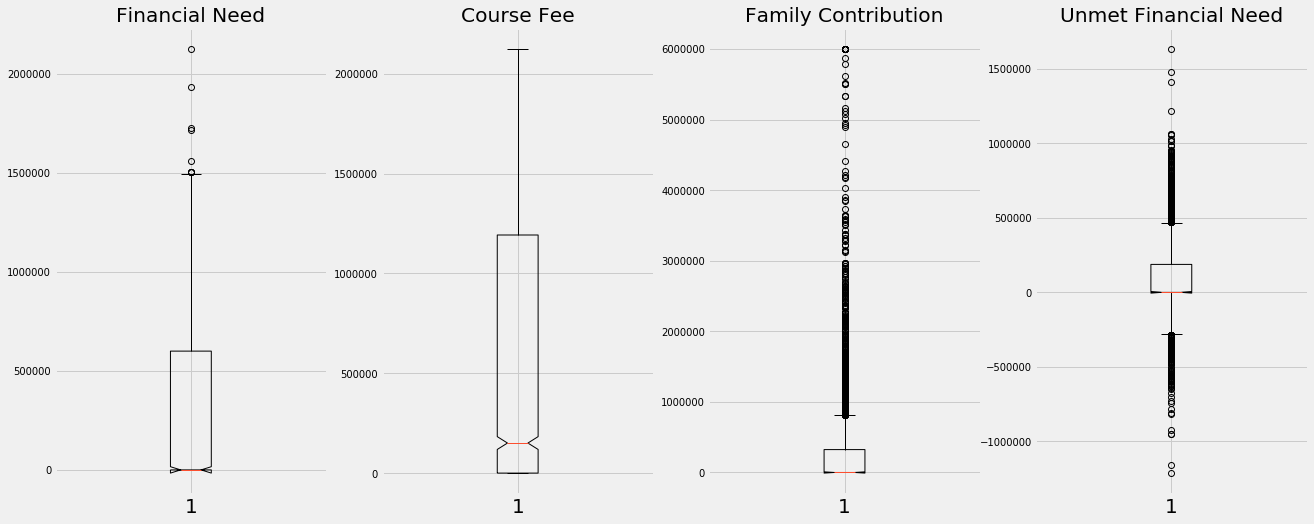

In [63]:
print("**Boxplot showing all the Financial variables**")

fig, axes1=plt.subplots(nrows = 1, ncols=4, figsize=(20,8))
b1 = axes1[0].boxplot(dat1['GROSS_FIN_NEED'], notch=True)
b2 = axes1[1].boxplot(dat1['COST_OF_ATTEND'], notch=True)
b3 = axes1[2].boxplot(dat1['EST_FAM_CONTRIBUTION'], notch=True)
b4 = axes1[3].boxplot(dat1['UNMET_NEED'], notch=True)

axes1[0].set_title('Financial Need')
axes1[1].set_title('Course Fee')
axes1[2].set_title('Family Contribution')
axes1[3].set_title('Unmet Financial Need')

plt.rcParams['xtick.labelsize']=10
plt.style.use('fivethirtyeight')

**Boxplot showing all the Hours attempted and earned as per Year**


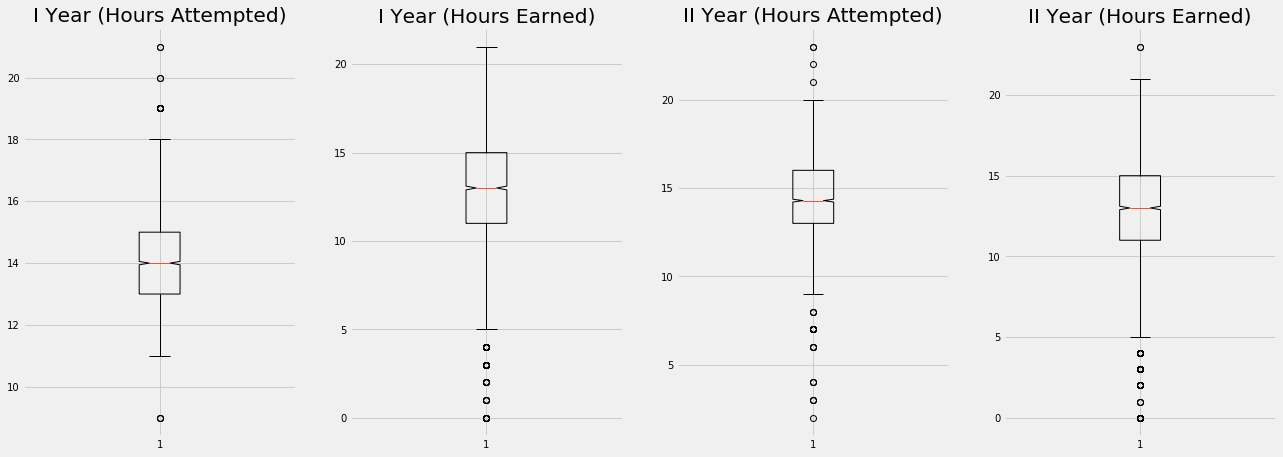

In [64]:
print("**Boxplot showing all the Hours attempted and earned as per Year**")
fig, axes=plt.subplots(nrows=1, ncols=4, figsize=(20,7))
bp1 = axes[0].boxplot(dat1['FIRST_TERM_ATTEMPT_HRS'], notch=True)
bp2 = axes[1].boxplot(dat1['FIRST_TERM_EARNED_HRS'], notch=True)
bp3 = axes[2].boxplot(dat1['SECOND_TERM_ATTEMPT_HRS'], notch=True)
bp4 = axes[3].boxplot(dat1['SECOND_TERM_EARNED_HRS'], notch=True)

axes[0].set_title('I Year (Hours Attempted)')
axes[1].set_title('I Year (Hours Earned)')
axes[2].set_title('II Year (Hours Attempted)')
axes[3].set_title('II Year (Hours Earned)')
plt.style.use('fivethirtyeight')

#plt.savefig('matplotlib.png')

## Clustering Mapping

**Cluster Mapping of all the Continuous Variables**


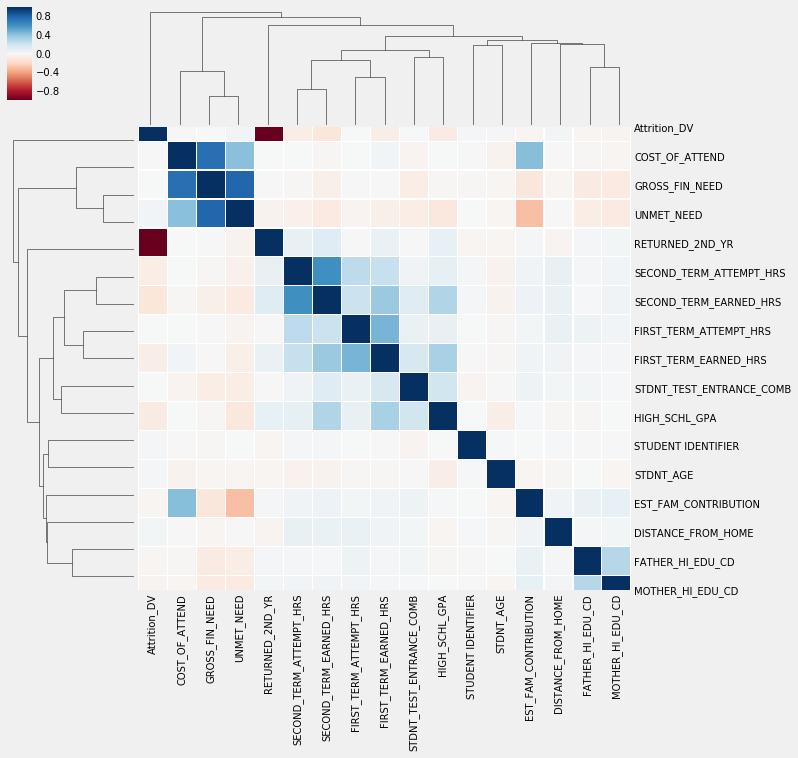

In [65]:
print("**Cluster Mapping of all the Continuous Variables**")
sns.clustermap(dat1.corr(),linewidths=0.1,vmax=1.0, square=True,linecolor='white',cmap=colormap)

## Feature Engineering
### Dummy Variables: One-Hot Encoding

In [66]:
# Unique values in all the categorical variables:
# DATASET [A] has only the categorical variables:

print("**Levels per Categorical Variables**")
print(" ")
A = dat1.drop(['STUDENT IDENTIFIER','STDNT_AGE','STDNT_TEST_ENTRANCE_COMB', 'RETURNED_2ND_YR','DISTANCE_FROM_HOME','HIGH_SCHL_GPA','FATHER_HI_EDU_CD','MOTHER_HI_EDU_CD','FIRST_TERM_ATTEMPT_HRS','FIRST_TERM_EARNED_HRS','SECOND_TERM_ATTEMPT_HRS','SECOND_TERM_EARNED_HRS','GROSS_FIN_NEED','COST_OF_ATTEND','EST_FAM_CONTRIBUTION','UNMET_NEED','Attrition_DV'], axis=1)
for col in A.columns:
    print(col, ':', len(A[col].unique()), 'labels')

print(" ")    
print("Total No. of dummy variables that will be created without binning the data are", A.nunique().sum())    

**Levels per Categorical Variables**
 
STDNT_GENDER : 2 labels
STDNT_BACKGROUND : 8 labels
IN_STATE_FLAG : 2 labels
INTERNATIONAL_STS : 2 labels
STDNT_MAJOR : 54 labels
STDNT_MINOR : 37 labels
CORE_COURSE_NAME_1_F : 69 labels
CORE_COURSE_GRADE_1_F : 7 labels
CORE_COURSE_NAME_2_F : 75 labels
CORE_COURSE_GRADE_2_F : 8 labels
CORE_COURSE_NAME_3_F : 75 labels
CORE_COURSE_GRADE_3_F : 7 labels
CORE_COURSE_NAME_4_F : 69 labels
CORE_COURSE_GRADE_4_F : 7 labels
CORE_COURSE_NAME_5_F : 54 labels
CORE_COURSE_GRADE_5_F : 5 labels
CORE_COURSE_NAME_6_F : 25 labels
CORE_COURSE_GRADE_6_F : 5 labels
CORE_COURSE_NAME_1_S : 67 labels
CORE_COURSE_GRADE_1_S : 9 labels
CORE_COURSE_NAME_2_S : 70 labels
CORE_COURSE_GRADE_2_S : 7 labels
CORE_COURSE_NAME_3_S : 69 labels
CORE_COURSE_GRADE_3_S : 7 labels
CORE_COURSE_NAME_4_S : 65 labels
CORE_COURSE_GRADE_4_S : 6 labels
CORE_COURSE_NAME_5_S : 52 labels
CORE_COURSE_GRADE_5_S : 6 labels
CORE_COURSE_NAME_6_S : 27 labels
CORE_COURSE_GRADE_6_S : 4 labels
HOUSING_STS : 2

### *** Decision for one-hot encoding ***
* Having 1360 dummy variables in the train & test will impact accuracy in the model.
* Large no. of features will lead to [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)
* Limit One-hot encoding to the top 10 most frequent labels of the variable (1 and 0) - this results into 1 binary variable for each of the top 10 most frequent labels and remaining labels will be dropped out. 
* Creating subset (A1) from the main data with only the columns where feature engineering is required i.e. the columns which have category level more than 20.
<br>
<h3> Advantage: </h3>
* Straight-forward to implement
* Does not require hours of variable exploration
* Does not expand massively the feature space
<br>
<h3> Disadvantage: </h3>
* Does not add any information that may make the variable more predictable 
* Does not keep the information of the labels ignored
<br>
<h5> Note:</h5> 
* Categorical variables usually have a few dominating categories and the remaining are just **white noise**.

In [67]:
A1 = pd.read_excel("Student Applications & Performance.xlsx", sheet_name='University information', usecols = ['STUDENT IDENTIFIER','STDNT_MAJOR', 'STDNT_MINOR', 'CORE_COURSE_NAME_1_F','CORE_COURSE_NAME_2_F','CORE_COURSE_NAME_3_F','CORE_COURSE_NAME_4_F','CORE_COURSE_NAME_5_F','CORE_COURSE_NAME_6_F','CORE_COURSE_NAME_1_S','CORE_COURSE_NAME_2_S','CORE_COURSE_NAME_3_S','CORE_COURSE_NAME_4_S','CORE_COURSE_NAME_5_S','CORE_COURSE_NAME_6_S','HIGH_SCHL_NAME'])
print(A1.shape)
A1.head()

(3400, 16)


,STUDENT IDENTIFIER,STDNT_MAJOR,STDNT_MINOR,CORE_COURSE_NAME_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_NAME_3_F,CORE_COURSE_NAME_4_F,CORE_COURSE_NAME_5_F,CORE_COURSE_NAME_6_F,CORE_COURSE_NAME_1_S,CORE_COURSE_NAME_2_S,CORE_COURSE_NAME_3_S,CORE_COURSE_NAME_4_S,CORE_COURSE_NAME_5_S,CORE_COURSE_NAME_6_S,HIGH_SCHL_NAME
0,7808615,Undeclared,N,ANTH 1105,ARTH 1100,ENGL 1102,PSYC 1101,NaN,NaN,CHEM 1151,CHEM 1151L,COMM 1110,ITDS 2749,NaN,NaN,SCHOOL 50
1,7830063,Undeclared,N,ANTH 1105,GERM 1002,ITDS 2735,MATH 1125,THEA 1100,POLS 1101,ECON 2105,ENGL 1102,NaN,NaN,NaN,NaN,SCHOOL 389
2,7847538,Mathematics,N,ANTH 1105,ENGL 1101,HIST 2111,MATH 1111,SOCI 1101,NaN,ENGL 1102,ENVS 1105,MUSC 1100,NaN,NaN,NaN,SCHOOL 82
3,8006429,Undeclared,N,ANTH 1107,COMM 1110,NaN,NaN,NaN,NaN,ENGL 1102,HIST 2112,LEAD 1705,MUSC 1100,NaN,NaN,SCHOOL 180
4,7962680,Art,N,ANTH 1107,ARTH 1100,CPSC 1105,MATH 1111,NaN,NaN,COMM 1110,ENGL 1101,HIST 2111,PSYC 1101,NaN,NaN,SCHOOL 2


In [68]:
# Top 10 most frequent levels in the variable [STDNT_MAJOR]

print("1. Total no. of levels present in the variable [STDNT_MAJOR]:", A1.STDNT_MAJOR.nunique())
print(" ")
print("2. Below are the Top 15 most frequent levels in the variable [STDNT_MAJOR]:")
A1.STDNT_MAJOR.value_counts().sort_values(ascending=False).head(15)

1. Total no. of levels present in the variable [STDNT_MAJOR]: 54
 
2. Below are the Top 15 most frequent levels in the variable [STDNT_MAJOR]:


Undeclared                   460
Biology                      362
Early Childhood Education    190
Pre-Nursing                  177
Nursing                      164
Psychology                   155
Pre-Business                 133
Theatre Arts                 131
Music Performance             99
Criminal Justice              98
Music Education               96
General Business              85
Exercise Science              81
Art                           75
Management                    72
Name: STDNT_MAJOR, dtype: int64

In [69]:
# Lets make a list with the most frequent categories of the variable [STDNT_MAJOR]:
top10 = [x for x in A1.STDNT_MAJOR.value_counts().sort_values(ascending=False).head(10).index]
top10

['Undeclared',
 'Biology',
 'Early Childhood Education',
 'Pre-Nursing',
 'Nursing',
 'Psychology',
 'Pre-Business',
 'Theatre Arts',
 'Music Performance',
 'Criminal Justice']

In [70]:
# Making the 10 binary variables:
for label in top10:
    A1[label] = np.where(A1['STDNT_MAJOR'] == label, 1,0)
    
A1[['STDNT_MAJOR'] + top10].head()   

,STDNT_MAJOR,Undeclared,Biology,Early Childhood Education,Pre-Nursing,Nursing,Psychology,Pre-Business,Theatre Arts,Music Performance,Criminal Justice
0,Undeclared,1,0,0,0,0,0,0,0,0,0
1,Undeclared,1,0,0,0,0,0,0,0,0,0
2,Mathematics,0,0,0,0,0,0,0,0,0,0
3,Undeclared,1,0,0,0,0,0,0,0,0,0
4,Art,0,0,0,0,0,0,0,0,0,0


In [71]:
# Lets make individiual lists with the top 10 most frequent categories of all variables:

top10_SMa = [x for x in A1.STDNT_MAJOR.value_counts().sort_values(ascending=False).head(10).index]
top10_SMi = [x for x in A1.STDNT_MINOR.value_counts().sort_values(ascending=False).head(10).index]
top10_1F = [x for x in A1.CORE_COURSE_NAME_1_F.value_counts().sort_values(ascending=False).head(10).index]
top10_2F = [x for x in A1.CORE_COURSE_NAME_2_F.value_counts().sort_values(ascending=False).head(10).index]
top10_3F = [x for x in A1.CORE_COURSE_NAME_3_F.value_counts().sort_values(ascending=False).head(10).index]
top10_4F = [x for x in A1.CORE_COURSE_NAME_4_F.value_counts().sort_values(ascending=False).head(10).index]
top10_5F = [x for x in A1.CORE_COURSE_NAME_5_F.value_counts().sort_values(ascending=False).head(10).index]
top10_6F = [x for x in A1.CORE_COURSE_NAME_6_F.value_counts().sort_values(ascending=False).head(10).index]
top10_1S = [x for x in A1.CORE_COURSE_NAME_1_S.value_counts().sort_values(ascending=False).head(10).index]
top10_2S = [x for x in A1.CORE_COURSE_NAME_2_S.value_counts().sort_values(ascending=False).head(10).index]
top10_3S = [x for x in A1.CORE_COURSE_NAME_3_S.value_counts().sort_values(ascending=False).head(10).index]
top10_4S = [x for x in A1.CORE_COURSE_NAME_4_S.value_counts().sort_values(ascending=False).head(10).index]
top10_5S = [x for x in A1.CORE_COURSE_NAME_5_S.value_counts().sort_values(ascending=False).head(10).index]
top10_6S = [x for x in A1.CORE_COURSE_NAME_6_S.value_counts().sort_values(ascending=False).head(10).index]
top10_HS = [x for x in A1.HIGH_SCHL_NAME.value_counts().sort_values(ascending=False).head(10).index]

In [72]:
# (data1) - DATASET which contains dummies for all the category variables with hugh labels:
# get whole set of dummy variables, for all the categorical variables

def one_hot_top_x(df, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the no. of most frequentlabels that we encode
    
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(data1[variable] == label,1,0)

# read the data again
data1 = pd.read_excel("Student Applications & Performance.xlsx", sheet_name='University information', usecols = ['STUDENT IDENTIFIER','STDNT_MAJOR', 'STDNT_MINOR', 'CORE_COURSE_NAME_1_F','CORE_COURSE_NAME_2_F','CORE_COURSE_NAME_3_F','CORE_COURSE_NAME_4_F','CORE_COURSE_NAME_5_F','CORE_COURSE_NAME_6_F','CORE_COURSE_NAME_1_S','CORE_COURSE_NAME_2_S','CORE_COURSE_NAME_3_S','CORE_COURSE_NAME_4_S','CORE_COURSE_NAME_5_S','CORE_COURSE_NAME_6_S','HIGH_SCHL_NAME'])  

# Encoding
one_hot_top_x(data1, 'STDNT_MAJOR', top10_SMa)
one_hot_top_x(data1, 'STDNT_MINOR', top10_SMi)
one_hot_top_x(data1, 'CORE_COURSE_NAME_1_F', top10_1F)
one_hot_top_x(data1, 'CORE_COURSE_NAME_2_F', top10_2F)
one_hot_top_x(data1, 'CORE_COURSE_NAME_3_F', top10_3F)
one_hot_top_x(data1, 'CORE_COURSE_NAME_4_F', top10_4F)
one_hot_top_x(data1, 'CORE_COURSE_NAME_5_F', top10_5F)
one_hot_top_x(data1, 'CORE_COURSE_NAME_6_F', top10_6F)
one_hot_top_x(data1, 'CORE_COURSE_NAME_1_S', top10_1S)
one_hot_top_x(data1, 'CORE_COURSE_NAME_2_S', top10_2S)
one_hot_top_x(data1, 'CORE_COURSE_NAME_3_S', top10_3S)
one_hot_top_x(data1, 'CORE_COURSE_NAME_4_S', top10_4S)
one_hot_top_x(data1, 'CORE_COURSE_NAME_5_S', top10_5S)
one_hot_top_x(data1, 'CORE_COURSE_NAME_6_S', top10_6S)
one_hot_top_x(data1, 'HIGH_SCHL_NAME', top10_HS)

print(data1.shape)
data1.head()

(3400, 166)


,STUDENT IDENTIFIER,STDNT_MAJOR,STDNT_MINOR,CORE_COURSE_NAME_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_NAME_3_F,CORE_COURSE_NAME_4_F,CORE_COURSE_NAME_5_F,CORE_COURSE_NAME_6_F,CORE_COURSE_NAME_1_S,...,HIGH_SCHL_NAME_SCHOOL 11,HIGH_SCHL_NAME_SCHOOL 130,HIGH_SCHL_NAME_SCHOOL 10,HIGH_SCHL_NAME_SCHOOL 1,HIGH_SCHL_NAME_SCHOOL 2,HIGH_SCHL_NAME_SCHOOL 34,HIGH_SCHL_NAME_SCHOOL 27,HIGH_SCHL_NAME_SCHOOL 9,HIGH_SCHL_NAME_SCHOOL 7,HIGH_SCHL_NAME_SCHOOL 87
0,7808615,Undeclared,N,ANTH 1105,ARTH 1100,ENGL 1102,PSYC 1101,NaN,NaN,CHEM 1151,...,0,0,0,0,0,0,0,0,0,0
1,7830063,Undeclared,N,ANTH 1105,GERM 1002,ITDS 2735,MATH 1125,THEA 1100,POLS 1101,ECON 2105,...,0,0,0,0,0,0,0,0,0,0
2,7847538,Mathematics,N,ANTH 1105,ENGL 1101,HIST 2111,MATH 1111,SOCI 1101,NaN,ENGL 1102,...,0,0,0,0,0,0,0,0,0,0
3,8006429,Undeclared,N,ANTH 1107,COMM 1110,NaN,NaN,NaN,NaN,ENGL 1102,...,0,0,0,0,0,0,0,0,0,0
4,7962680,Art,N,ANTH 1107,ARTH 1100,CPSC 1105,MATH 1111,NaN,NaN,COMM 1110,...,0,0,0,0,1,0,0,0,0,0


In [73]:
## cleaning data1 and removing the duplicate columns and only keeping the dummy variables so that we can concatinate it with the main dataset to be used for modelling purpose.

data1 = data1.drop(['STDNT_MAJOR', 'STDNT_MINOR', 'CORE_COURSE_NAME_1_F','CORE_COURSE_NAME_2_F','CORE_COURSE_NAME_3_F','CORE_COURSE_NAME_4_F','CORE_COURSE_NAME_5_F','CORE_COURSE_NAME_6_F','CORE_COURSE_NAME_1_S','CORE_COURSE_NAME_2_S','CORE_COURSE_NAME_3_S','CORE_COURSE_NAME_4_S','CORE_COURSE_NAME_5_S','CORE_COURSE_NAME_6_S','HIGH_SCHL_NAME'], axis=1)
print(data1.shape)
list(data1.columns)

(3400, 151)


['STUDENT IDENTIFIER',
 'STDNT_MAJOR_Undeclared',
 'STDNT_MAJOR_Biology',
 'STDNT_MAJOR_Early Childhood Education',
 'STDNT_MAJOR_Pre-Nursing',
 'STDNT_MAJOR_Nursing',
 'STDNT_MAJOR_Psychology',
 'STDNT_MAJOR_Pre-Business',
 'STDNT_MAJOR_Theatre Arts',
 'STDNT_MAJOR_Music Performance',
 'STDNT_MAJOR_Criminal Justice',
 'STDNT_MINOR_N',
 'STDNT_MINOR_Spanish',
 'STDNT_MINOR_Psychology',
 'STDNT_MINOR_Music',
 'STDNT_MINOR_Foundations of Business',
 'STDNT_MINOR_Communication',
 'STDNT_MINOR_History',
 'STDNT_MINOR_Theatre Arts',
 'STDNT_MINOR_Criminal Justice',
 'STDNT_MINOR_Computer Science - Systems',
 'CORE_COURSE_NAME_1_F_ENGL 1101',
 'CORE_COURSE_NAME_1_F_COMM 1110',
 'CORE_COURSE_NAME_1_F_HIST 2111',
 'CORE_COURSE_NAME_1_F_MATH 1111',
 'CORE_COURSE_NAME_1_F_CHEM 1211',
 'CORE_COURSE_NAME_1_F_ARTH 1100',
 'CORE_COURSE_NAME_1_F_HIST 2112',
 'CORE_COURSE_NAME_1_F_CHEM 1151',
 'CORE_COURSE_NAME_1_F_POLS 1101',
 'CORE_COURSE_NAME_1_F_ECON 2106',
 'CORE_COURSE_NAME_2_F_ENGL 1101',
 'COR

In [74]:
## dataset with dummy for lavel label category variables

print(data1.shape)
data1.head()

(3400, 151)


,STUDENT IDENTIFIER,STDNT_MAJOR_Undeclared,STDNT_MAJOR_Biology,STDNT_MAJOR_Early Childhood Education,STDNT_MAJOR_Pre-Nursing,STDNT_MAJOR_Nursing,STDNT_MAJOR_Psychology,STDNT_MAJOR_Pre-Business,STDNT_MAJOR_Theatre Arts,STDNT_MAJOR_Music Performance,...,HIGH_SCHL_NAME_SCHOOL 11,HIGH_SCHL_NAME_SCHOOL 130,HIGH_SCHL_NAME_SCHOOL 10,HIGH_SCHL_NAME_SCHOOL 1,HIGH_SCHL_NAME_SCHOOL 2,HIGH_SCHL_NAME_SCHOOL 34,HIGH_SCHL_NAME_SCHOOL 27,HIGH_SCHL_NAME_SCHOOL 9,HIGH_SCHL_NAME_SCHOOL 7,HIGH_SCHL_NAME_SCHOOL 87
0,7808615,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7830063,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7847538,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8006429,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7962680,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [75]:
# main dataset

print(dat1.shape)
dat1.head()

(3400, 53)


,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE_COMB,CORE_COURSE_NAME_1_F,...,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,Entrance_Test_Decile,Attrition_DV
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,1150.0,ANTH 1105,...,16,16,14.0,14.0,0,0,0,0.0,Outstanding,1
1,7830063,19,F,BGD 1,N,N,Undeclared,N,1190.0,ANTH 1105,...,18,18,18.0,18.0,570000,1355760,785760,459300.0,Outstanding,0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,1030.0,ANTH 1105,...,15,15,14.0,14.0,0,0,0,0.0,Smart,0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,1220.0,ANTH 1107,...,13,13,14.0,14.0,0,0,0,0.0,Outstanding,0
4,7962680,18,F,BGD 1,Y,N,Art,N,1190.0,ANTH 1107,...,12,12,12.0,12.0,835920,1355760,519840,278340.0,Outstanding,0


In [76]:
# Concatinating both the datasets to create one final dataset (cbind):
# (STUDENT IDENTIFIER) -> as the unique value in both the datasets:
# Dropping the duplicate variables.

final = pd.merge(dat1, data1, how='outer', on ='STUDENT IDENTIFIER')
final = final.drop(['STUDENT IDENTIFIER','STDNT_MAJOR', 'STDNT_MINOR', 'CORE_COURSE_NAME_1_F','CORE_COURSE_NAME_2_F','CORE_COURSE_NAME_3_F','CORE_COURSE_NAME_4_F','CORE_COURSE_NAME_5_F','CORE_COURSE_NAME_6_F','CORE_COURSE_NAME_1_S','CORE_COURSE_NAME_2_S','CORE_COURSE_NAME_3_S','CORE_COURSE_NAME_4_S','CORE_COURSE_NAME_5_S','CORE_COURSE_NAME_6_S','HIGH_SCHL_NAME','RETURNED_2ND_YR'], axis=1)
final.head()

,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_TEST_ENTRANCE_COMB,CORE_COURSE_GRADE_1_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_GRADE_3_F,CORE_COURSE_GRADE_4_F,...,HIGH_SCHL_NAME_SCHOOL 11,HIGH_SCHL_NAME_SCHOOL 130,HIGH_SCHL_NAME_SCHOOL 10,HIGH_SCHL_NAME_SCHOOL 1,HIGH_SCHL_NAME_SCHOOL 2,HIGH_SCHL_NAME_SCHOOL 34,HIGH_SCHL_NAME_SCHOOL 27,HIGH_SCHL_NAME_SCHOOL 9,HIGH_SCHL_NAME_SCHOOL 7,HIGH_SCHL_NAME_SCHOOL 87
0,18,F,BGD 1,Y,N,1150.0,A,A,A,A,...,0,0,0,0,0,0,0,0,0,0
1,19,F,BGD 1,N,N,1190.0,A,A,A,A,...,0,0,0,0,0,0,0,0,0,0
2,18,M,BGD 1,Y,N,1030.0,A,A,A,A,...,0,0,0,0,0,0,0,0,0,0
3,18,M,BGD 1,Y,N,1220.0,A,A,Missing,Missing,...,0,0,0,0,0,0,0,0,0,0
4,18,F,BGD 1,Y,N,1190.0,A,A,A,A,...,0,0,0,0,1,0,0,0,0,0


In [77]:
# Now all the cat variables are showing lower labels:
final.describe(exclude=[np.number])

,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,CORE_COURSE_GRADE_1_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_GRADE_3_F,CORE_COURSE_GRADE_4_F,CORE_COURSE_GRADE_5_F,CORE_COURSE_GRADE_6_F,...,CORE_COURSE_GRADE_2_S,CORE_COURSE_GRADE_3_S,CORE_COURSE_GRADE_4_S,CORE_COURSE_GRADE_5_S,CORE_COURSE_GRADE_6_S,HOUSING_STS,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,Entrance_Test_Decile
count,3400,3400,3400,3400,3400,3400,3400,3400,3400,3400,...,3400,3400,3400,3400,3400,3400,3400,3400,3400,3400
unique,2,8,2,2,7,8,7,7,5,5,...,7,7,6,6,4,2,5,5,3,5
top,F,BGD 1,Y,N,C,B,B,Missing,Missing,Missing,...,B,Missing,Missing,Missing,Missing,Off Campus,High School,College/Beyond,Bachelors,Very Poor
freq,2140,2082,3063,3373,1024,1339,1155,1597,2755,3272,...,1118,1038,2045,2950,3319,1981,1336,1500,3384,878


## Splitting Dataset into Train & Test:

In [78]:
# Splitting final dataset into X dataset (Predictor variables) & Y dataset (Target variable):
X = final.drop('Attrition_DV', axis=1)
Y = final['Attrition_DV']

In [79]:
# X dataset - creating dummies on the remaining categorical variables with lesser labels
X = pd.get_dummies(X)
print("The Dimension of X (Predictor Dataset):",X.shape)
print("The Dimension of Y (Target Dataset):",Y.shape)
X.head()

The Dimension of X (Predictor Dataset): (3400, 276)
The Dimension of Y (Target Dataset): (3400,)


,STDNT_AGE,STDNT_TEST_ENTRANCE_COMB,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_CD,MOTHER_HI_EDU_CD,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,...,MOTHER_HI_EDU_DESC_No Information,MOTHER_HI_EDU_DESC_Other/Unknown,DEGREE_GROUP_DESC_Associate,DEGREE_GROUP_DESC_Bachelors,DEGREE_GROUP_DESC_Career Associate,Entrance_Test_Decile_Very Poor,Entrance_Test_Decile_Poor,Entrance_Test_Decile_Average,Entrance_Test_Decile_Smart,Entrance_Test_Decile_Outstanding
0,18,1150.0,150.0,4.00,2.560647,2.571281,16,16,14.0,14.0,...,1,0,0,1,0,0,0,0,0,1
1,19,1190.0,69.0,2.89,3.000000,3.000000,18,18,18.0,18.0,...,0,0,0,1,0,0,0,0,0,1
2,18,1030.0,150.0,3.39,2.000000,4.000000,15,15,14.0,14.0,...,0,1,0,1,0,0,0,0,1,0
3,18,1220.0,150.0,2.93,3.000000,3.000000,13,13,14.0,14.0,...,0,0,0,1,0,0,0,0,0,1
4,18,1190.0,69.0,3.86,3.000000,2.000000,12,12,12.0,12.0,...,0,0,0,1,0,0,0,0,0,1


In [80]:
# Split x and y into training and testing set (70%-30% ratio and a random state of 200)

import sklearn.model_selection as ms
x_train, x_test, y_train, y_test= ms.train_test_split(X,Y, test_size=0.3, random_state=200)

In [81]:
print("X-Train :", x_train.shape)
print("Y-Train :", y_train.shape)  # Labels of training dataset
print("X-Test  :", x_test.shape)
print("Y-Test  :", y_test.shape)   # Labels of testing dataset

X-Train : (2380, 276)
Y-Train : (2380,)
X-Test  : (1020, 276)
Y-Test  : (1020,)


___

### VIF

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

C:\Users\home\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [83]:
# inf -> Infinity
vif.round(1).head(20)

,VIF Factor,features
0,1.2,STDNT_AGE
1,5.4,STDNT_TEST_ENTRANCE_COMB
2,1.2,DISTANCE_FROM_HOME
3,1.7,HIGH_SCHL_GPA
4,inf,FATHER_HI_EDU_CD
5,inf,MOTHER_HI_EDU_CD
6,1.8,FIRST_TERM_ATTEMPT_HRS
7,3.3,FIRST_TERM_EARNED_HRS
8,2.4,SECOND_TERM_ATTEMPT_HRS
9,4.2,SECOND_TERM_EARNED_HRS


In [84]:
vif.to_csv('VIF.csv')

___

# Model Building -

### I. [Binary Logistic Regression](https://kite.com/python/docs/sklearn.linear_model.LogisticRegression)

* [Solvers Definition](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions) <br>
    - **newton-cg** : Newton’s method <br>
    - **sag** : Stochastic Average Gradient <br>
    - **lbfgs** : Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm <br>
    - **liblinear** : A Library for Large Linear Classification

In [85]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(max_iter= 500)
log.fit(x_train, y_train)

C:\Users\home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
print("1. Train Score:", round(log.score(x_train, y_train),3)*100, "%")
print("2. Test Score:", round(log.score(x_test, y_test),4)*100, "%")

1. Train Score: 78.8 %
2. Test Score: 78.43 %


In [87]:
y_predict_LR = log.predict(x_test)
y_predict_LR

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
import sklearn.metrics as metrics

print("**Confusion Matrix**")
LR_CM = metrics.confusion_matrix(y_test, y_predict_LR)
LR_CM

**Confusion Matrix**


array([[800,   1],
       [219,   0]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

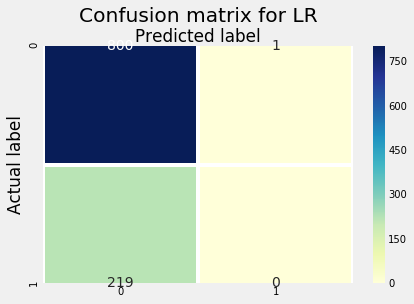

In [89]:
class_names=[1,0] 
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(LR_CM), annot=True, cmap="YlGnBu" ,fmt='g', linewidths= 3, linecolor='white')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for LR', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

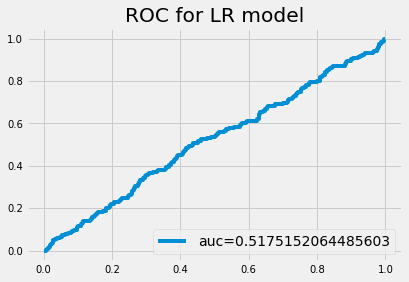

In [90]:
## ROC curve: [AUC >=]

y_pred_proba = log.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.title("ROC for LR model")
plt.legend(loc=4)
plt.show()

___

### II. DECISION TREE: Classification Model - (better interpretation)

In [91]:
# Build the Decision Tree Classifier (DTC)
# Parameter: Depth=3

import sklearn.tree as tree
cl=tree.DecisionTreeClassifier(max_depth=3, random_state=200)

In [92]:
# Lets fit the tree on training dataset 
cl.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=200, splitter='best')

In [93]:
# Lets check what is the accuracy of tree
print("The accuracy of Decision Tree Classifier is:", round(cl.score(x_test,y_test),4)*100, "%")

The accuracy of Decision Tree Classifier is: 82.84 %


In [94]:
# Predicting Attrition on X_test dataset
y_predict_DT = cl.predict(x_test)
y_predict_DT

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
# Confusion Matrix - Is a matrix between predicted values Vs Actual Values 
# Importing some imp libraries

import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
import sklearn.datasets as datasets
#from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

print("**Confusion Matrix**")
DT_CM = metrics.confusion_matrix(y_test, y_predict_DT)
DT_CM

**Confusion Matrix**


array([[791,  10],
       [165,  54]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

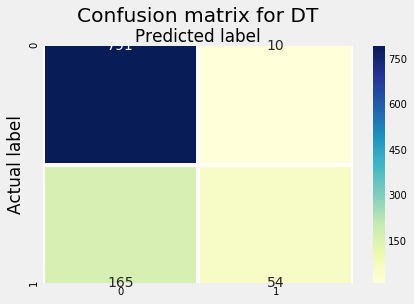

In [96]:
class_names=[0,1] 
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(DT_CM), annot=True,cmap="YlGnBu" ,fmt='g',linewidths= 3, linecolor='white')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for DT', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [97]:
# Plotting the decision tree:
import pydotplus

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'
os.chdir('F:\BA - Jigsaw\Capstone project\Project')

In [98]:
dot_data=tree.export_graphviz(cl, out_file=None, feature_names= X.columns, class_names= ['0','1'], filled= True, rounded=True, special_characters=True, proportion=True)
graph=pydotplus.graph_from_dot_data(dot_data)

**Decision Tree Classifier**


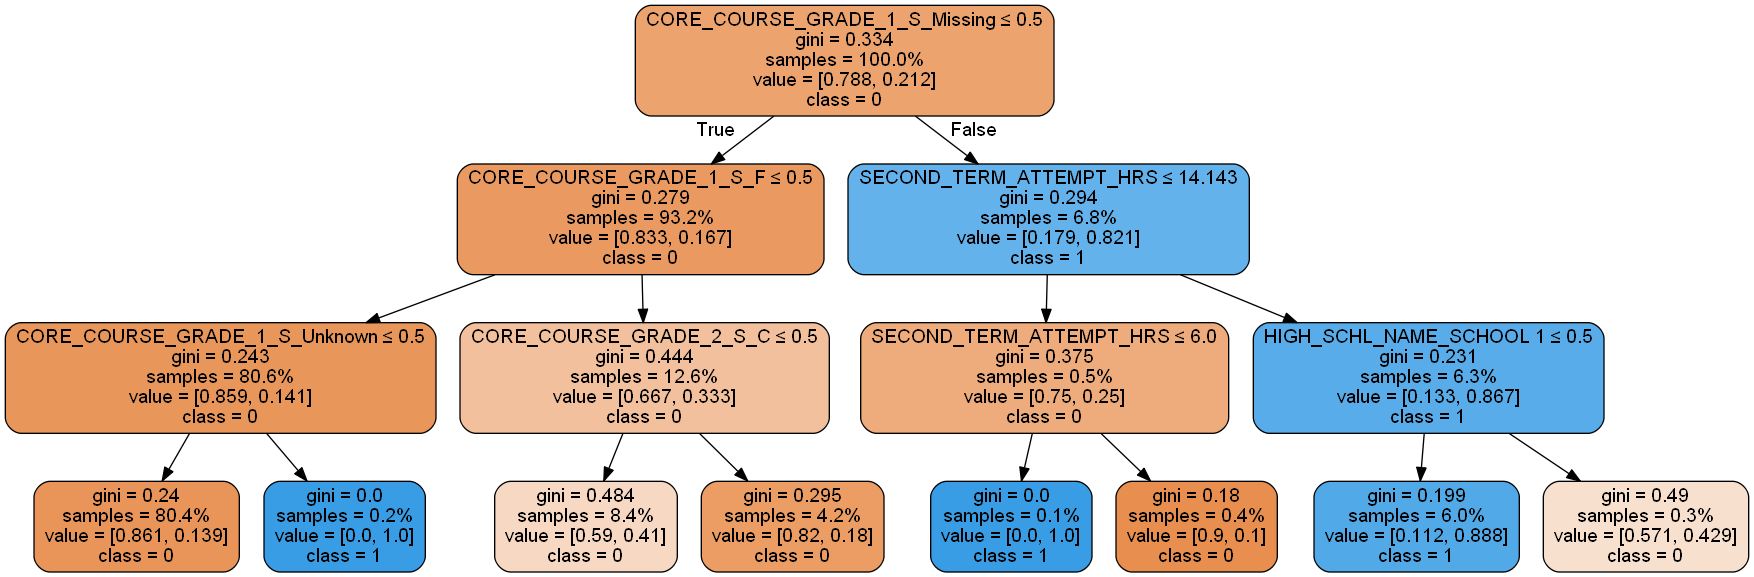

In [99]:
#Displaying the image of the decision tree:
from IPython.display import Image

print("**Decision Tree Classifier**")
Image(graph.create_png())

In [100]:
# Lets try to build various tree with different depth value 

mod = ms.GridSearchCV(cl, param_grid={'max_depth':[2,3,4,5,6,7,8,9,10],'criterion':['gini']})
mod.fit(x_train, y_train)

C:\Users\home\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=200,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_d

In [101]:
mod.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=200, splitter='best')

In [102]:
print("The best score of the Decision Tree can make:", round(mod.best_score_,4)*100,"%")


The best score of the Decision Tree can make: 83.19 %


In [103]:
# Top 6 statistically significant variables:

print("**Top 6 statistically significant variables**")
pd.Series(cl.feature_importances_, index= X.columns).sort_values(ascending=False).head(6)

**Top 6 statistically significant variables**


CORE_COURSE_GRADE_1_S_Missing    0.736909
CORE_COURSE_GRADE_1_S_F          0.109276
SECOND_TERM_ATTEMPT_HRS          0.063680
CORE_COURSE_GRADE_2_S_C          0.040281
CORE_COURSE_GRADE_1_S_Unknown    0.033759
HIGH_SCHL_NAME_SCHOOL 1          0.016096
dtype: float64

In [104]:
# df -> dataset of the actuals and predicted values of the attrition information:
print("**Dataset showing the actuals and predicted values of the attrition information**")
ABC = cl.fit(x_train,y_train)
y_pred = ABC.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df.head(20)

**Dataset showing the actuals and predicted values of the attrition information**


,Actual,Predicted
2200,0,0
228,0,0
2276,0,0
131,0,0
2694,0,0
2492,0,0
1205,1,0
3313,1,1
1403,0,0
2209,0,0


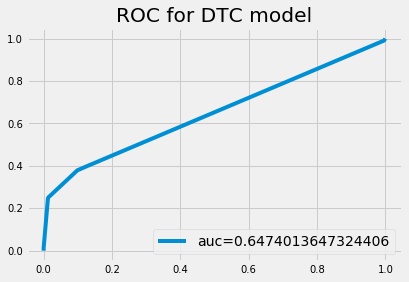

In [105]:
## ROC curve:

y_pred_proba = cl.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.title("ROC for DTC model")
plt.legend(loc=4)
plt.show()

___

### III. Ensemble Model - Random Forest (increase efficiency)

In [106]:
## train, test datasets are already defined, hence using the same for ensemble model:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100)

In [107]:
RF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [108]:
print("Score for 1st Ensemble Model- Random Forest:", round(RF.score(x_train, y_train),2)*100,"%")
print("As the score is 100% - This might lead to overfitting!")

Score for 1st Ensemble Model- Random Forest: 100.0 %
As the score is 100% - This might lead to overfitting!


In [109]:
from sklearn.model_selection import GridSearchCV

#Using max_depth, criterion will suffice for DT Models, rest all will remain constant 
parameters = {'criterion' : ('gini', 'entropy')
              , 'max_depth' : (4,7,8,9,10,11,12,13,14,15,20, 25, 30)
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'n_estimators' : (10,100)
             }
RF_grid = GridSearchCV(RandomForestClassifier(), param_grid= parameters, cv=3)
RF_grid

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [110]:
RF_grid_model = RF_grid.fit(x_train, y_train)

In [111]:
RF_grid_model.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [112]:
#Build model with best estimates 
RF_Model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [113]:
RF_Model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [114]:
print("Score for Best Ensemble Model- Random Forest:",round(RF_Model.score(x_train, y_train),2)*100,"%")

Score for Best Ensemble Model- Random Forest: 90.0 %


In [115]:
print("**Dataframe showing Top 20 Feature Importance in descending order**")
best_features = pd.DataFrame({'Features': x_train.columns, 'Importance':RF_Model.feature_importances_})
best_features.sort_values('Importance', ascending=False).head(20)

**Dataframe showing Top 20 Feature Importance in descending order**


,Features,Importance
223,CORE_COURSE_GRADE_1_S_Missing,0.094779
9,SECOND_TERM_EARNED_HRS,0.041770
8,SECOND_TERM_ATTEMPT_HRS,0.040592
232,CORE_COURSE_GRADE_2_S_Missing,0.033531
3,HIGH_SCHL_GPA,0.026789
13,UNMET_NEED,0.023303
7,FIRST_TERM_EARNED_HRS,0.023074
1,STDNT_TEST_ENTRANCE_COMB,0.020132
2,DISTANCE_FROM_HOME,0.019842
6,FIRST_TERM_ATTEMPT_HRS,0.017089


**Graph showing Top 10 Feature Importance**


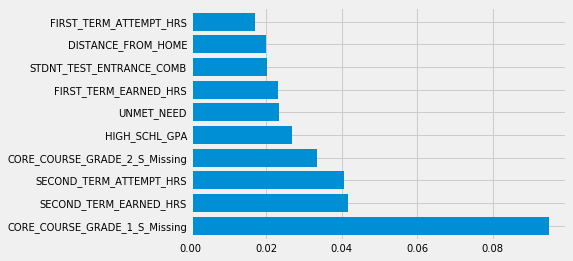

In [116]:
print("**Graph showing Top 10 Feature Importance**")
pd.Series(RF_Model.feature_importances_,X.columns).sort_values(ascending=False).head(10).plot.barh(width=0.8)

In [117]:
y_predict_RF = RF_Model.predict(x_test)
y_predict_RF

array([0, 0, 0, ..., 0, 0, 0])

In [118]:
print("**Confusion Matrix**")
RF_CM = metrics.confusion_matrix(y_test, y_pred)
RF_CM

**Confusion Matrix**


array([[791,  10],
       [165,  54]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

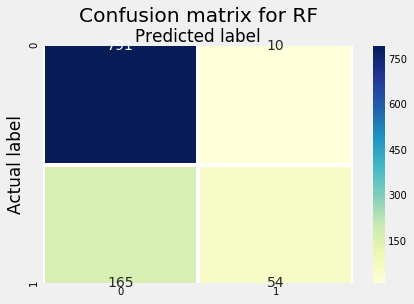

In [119]:
class_names=[0,1] 
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(RF_CM), annot=True,cmap="YlGnBu" ,fmt='g',linewidths= 3, linecolor='white')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for RF', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [120]:
print("1. Train Score:", round(RF_Model.score(x_train, y_train),2)*100, "%")
print("2. Test Score:", round(RF_Model.score(x_test, y_test),4)*100, "%")

1. Train Score: 90.0 %
2. Test Score: 82.45 %


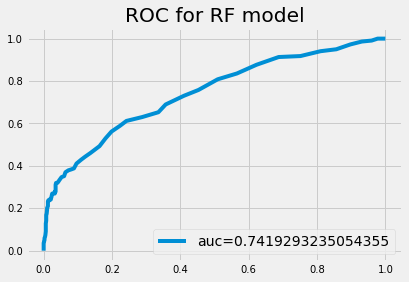

In [121]:
## ROC curve:

y_pred_proba = RF.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.title("ROC for RF model")
plt.legend(loc=4)
plt.show()

___

### Model Accuracy Summaries:
* FPR/TPR - False Positive Rate & True Positive Rate in the confusion Matrix
* Accuracy - Computes the number of correctly classified data points with respect to the total data points.
* AUC - Area under Curve
* Precision - Of all the points that the model predicted to be positive, how many of them are truly positive.
* Recall - Of all the actually positive points, how many of them the model predicts as positive.

In [122]:
print("**I. Metrics for Binary Logistic Regression Model**")
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, y_predict_LR)
print("1. FPR/TPR:", round(metrics.auc(fpr1, tpr1),2))
print("2. Accuracy:",  round(metrics.accuracy_score(y_test, y_predict_LR),2))
print("3. AUC:",  round(metrics.roc_auc_score(y_test, y_predict_LR),2))
print("4. Precision:", round(metrics.average_precision_score(y_test, y_predict_LR),2))
print("5. Recall:",    round(metrics.recall_score(y_test, y_predict_LR),2))
print(" ")

print("**II. Metrics for Decision Tree Classifier Model**")
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_predict_DT)
print("1. FPR/TPR:", round(metrics.auc(fpr2, tpr2),2))
print("2. Accuracy:",  round(metrics.accuracy_score(y_test, y_predict_DT),2))
print("3. AUC:",  round(metrics.roc_auc_score(y_test, y_predict_DT),2))
print("4. Precision:", round(metrics.average_precision_score(y_test, y_predict_DT),2))
print("5. Recall:",    round(metrics.recall_score(y_test, y_predict_DT),2))
print(" ")

print("**III. Metrics for Random Forest Model**")
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test, y_predict_RF)
print("1. FPR/TPR:", round(metrics.auc(fpr3, tpr3),2))
print("2. Accuracy:",  round(metrics.accuracy_score(y_test, y_predict_RF),2))
print("3. AUC:",  round(metrics.roc_auc_score(y_test, y_predict_RF),2))
print("4. Precision:", round(metrics.average_precision_score(y_test, y_predict_RF),2))
print("5. Recall:",    round(metrics.recall_score(y_test, y_predict_RF),2))

**I. Metrics for Binary Logistic Regression Model**
1. FPR/TPR: 0.5
2. Accuracy: 0.78
3. AUC: 0.5
4. Precision: 0.21
5. Recall: 0.0
 
**II. Metrics for Decision Tree Classifier Model**
1. FPR/TPR: 0.62
2. Accuracy: 0.83
3. AUC: 0.62
4. Precision: 0.37
5. Recall: 0.25
 
**III. Metrics for Random Forest Model**
1. FPR/TPR: 0.61
2. Accuracy: 0.82
3. AUC: 0.61
4. Precision: 0.36
5. Recall: 0.24


___